In [151]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# import csv file as df
df = pd.read_csv('Purchase_Orders_and_Contracts.csv')

C:\Users\nguye\AppData\Local\Temp\ipykernel_41652\3017885433.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Purchase_Orders_and_Contracts.csv')


In [153]:
df.columns

Index(['RECORD TYPE', 'DOCUMENT NUMBER', 'SOURCE DOCUMENT TYPE',
       'DOCUMENT DESCRIPTION', 'REQUISITION NUMBER', 'INPUT DATE',
       'TOTAL AMOUNT', 'DEPARTMENT NUMBER', 'DEPARTMENT NAME', 'COST CENTER',
       'COST CENTER NAME', 'DOCUMENT TYPE CODE', 'DOCUMENT TYPE DESCRIPTION',
       'DOCUMENT STATUS CODE', 'DOCUMENT STATUS DESCRIPTION', 'VOUCHED AMOUNT',
       'START DATE', 'EXPIRATION DATE', 'EXTENSION DATE', 'ANNUAL CONTRACT',
       'VENDOR NAME 1', 'VENDOR NAME 2', 'VENDOR CITY', 'VENDOR STATE',
       'VENDOR ZIP', 'VENDOR TYPE', 'GENDER', 'ETHNICITY', 'STATUS', 'CLASS',
       'GEOGRAPHIC AREA', 'INDEPENDENT CONTRACTOR', 'MINORITY',
       'DISADVANTAGED', 'DISABLED VETERAN', 'SB DISABLED VET', 'SB MINORITY',
       'SB MINORITY WOMAN', 'SB NON-MINORITY', 'SB DISADVANTAGED',
       'SB VETERAN', 'SB WOMAN', 'TOTAL ITEMS', 'ITEM NUMBER',
       'ITEM DESCRIPTION', 'ITEM QUANTITY ORDERED', 'ITEM UNIT OF MEASURE',
       'ITEM UNIT COST', 'ITEM TOTAL COST', 'COMMODITY CO

In [154]:
df.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,ITEM NUMBER,ITEM DESCRIPTION,ITEM QUANTITY ORDERED,ITEM UNIT OF MEASURE,ITEM UNIT COST,ITEM TOTAL COST,COMMODITY CODE,COMMODITY DESCRIPTION,EXPENSE TYPE,EXPENSE TYPE DESCRIPTION
0,D,21008510,P,ROOFING KIT 4 JEWEL NEWMAN CO,12600.0,10/11/2021,0.0,7830.0,BLDG&GROUND,7830.0,...,1.0,TORCH CAP SHEET (1ROLL) ASPHALT PRIMER (3GALL...,1.0,EACH,334.81,334.81,77070.0,ROOFING REPAIR KITS,647200.0,REPAIR/MAINTENANCE-BUILDINGS
1,D,800005509,C,Design Signage for Mississippi Riverfront/AFNA,13464.0,8/7/2023,0.0,1500.0,DOWNTOWN DEVELOPMENT DISTRICT,1500.0,...,2.0,Primary Design Services: 1. Develop Sign Graph...,1.0,NaN,2000.00,2000.00,90735.0,DESIGN SERVICES,NaN,NaN
2,D,21010298,P,AIR CONDITIONING HEATING AND,15233.0,12/15/2021,0.0,7830.0,BLDG&GROUND,7830.0,...,2.0,BUSSMANN FUSE GLASS FUSE TIME DELAY 6/10A ...,2.0,EACH,15.91,31.82,3167.0,"HVAC EQUIPMENT, ACCESSORIES AN",632000.0,BUILDING MATERIALS
3,H,19001266,P,Copier Paper,2503.0,2/15/2019,157.8,7110.0,TRAN & DRAIN,7110.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D,19007185,P,LIGHTNING BOLT ORDER,12310.0,10/8/2019,0.0,7030.0,BUSINESS OPS,7030.0,...,7.0,CAP GALVANIZED 3/8,12.0,EACH,3.00,36.00,65927.0,CAPS,150000.0,INVENTORY


In [155]:
df.shape

(305120, 53)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305120 entries, 0 to 305119
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   RECORD TYPE                  305120 non-null  object 
 1   DOCUMENT NUMBER              305120 non-null  int64  
 2   SOURCE DOCUMENT TYPE         305120 non-null  object 
 3   DOCUMENT DESCRIPTION         305044 non-null  object 
 4   REQUISITION NUMBER           305120 non-null  float64
 5   INPUT DATE                   305120 non-null  object 
 6   TOTAL AMOUNT                 305120 non-null  object 
 7   DEPARTMENT NUMBER            305119 non-null  float64
 8   DEPARTMENT NAME              305119 non-null  object 
 9   COST CENTER                  305118 non-null  float64
 10  COST CENTER NAME             305118 non-null  object 
 11  DOCUMENT TYPE CODE           305119 non-null  object 
 12  DOCUMENT TYPE DESCRIPTION    305119 non-null  object 
 13 

In [157]:
df['INPUT DATE'] = pd.to_datetime(df['INPUT DATE'], errors='coerce')

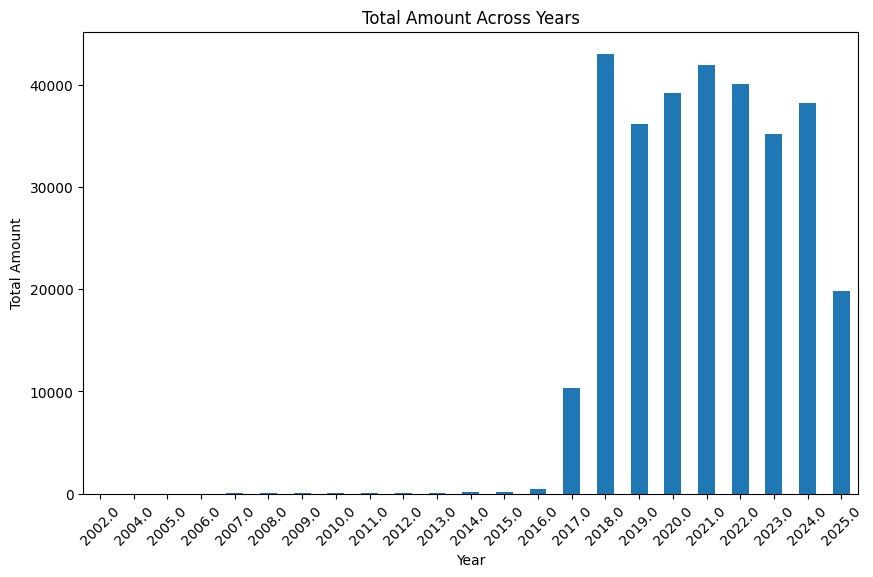

In [158]:
# graph total amount across years
plt.figure(figsize=(10, 6))
df['INPUT DATE'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Total Amount Across Years')
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

In [159]:
# statistics of total_amount 
df['TOTAL AMOUNT'].describe()

count     305120.0
unique     51178.0
top            0.0
freq      211258.0
Name: TOTAL AMOUNT, dtype: float64

In [160]:
df[df['TOTAL AMOUNT'] == 0].shape[0]

211258

In [161]:
# Convert column to numeric (non-numeric values become NaN)
df['TOTAL AMOUNT'] = pd.to_numeric(df['TOTAL AMOUNT'], errors='coerce')

# Now filter and count
count_0_to_1k = df[(df['TOTAL AMOUNT'] > 0) & (df['TOTAL AMOUNT'] < 1000)].shape[0]
print(count_0_to_1k)


39485


In [162]:
# give me number of records where total amount is less than 1000
df[df['TOTAL AMOUNT'] < 1000].shape[0]

262722

In [163]:
df[df['TOTAL AMOUNT'] > 1000].shape[0]

42310

In [164]:
df.shape

(305120, 53)

In [165]:
# variable representing number of records where date is 2017 or later
count_earlier_than_2017 = df[df['INPUT DATE'] < '2017-01-01'].shape[0]
count_earlier_than_2017

1173

In [166]:
# variable representing number of records where date is between 2017 and 2020
count_2017_to_2020 = df[(df['INPUT DATE'] >= '2017-01-01') & (df['INPUT DATE'] < '2020-01-01')].shape[0]
count_2017_to_2020

89539

In [167]:
# variable representing number of records where date is 2020 or later
count_2020_or_later = df[df['INPUT DATE'] >= '2020-01-01'].shape[0]
count_2020_or_later

214407

In [168]:
df_filtered = df[df['INPUT DATE'] >= '2017-01-01']

In [169]:
df_filtered.shape

(303946, 53)

In [170]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303946 entries, 0 to 305119
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   RECORD TYPE                  303946 non-null  object        
 1   DOCUMENT NUMBER              303946 non-null  int64         
 2   SOURCE DOCUMENT TYPE         303946 non-null  object        
 3   DOCUMENT DESCRIPTION         303894 non-null  object        
 4   REQUISITION NUMBER           303946 non-null  float64       
 5   INPUT DATE                   303946 non-null  datetime64[ns]
 6   TOTAL AMOUNT                 303946 non-null  float64       
 7   DEPARTMENT NUMBER            303945 non-null  float64       
 8   DEPARTMENT NAME              303945 non-null  object        
 9   COST CENTER                  303945 non-null  float64       
 10  COST CENTER NAME             303945 non-null  object        
 11  DOCUMENT TYPE CODE           30

In [171]:
# convert total amount to numeric
df_filtered['TOTAL AMOUNT'] = pd.to_numeric(df_filtered['TOTAL AMOUNT'], errors='coerce')

C:\Users\nguye\AppData\Local\Temp\ipykernel_41652\2894222695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TOTAL AMOUNT'] = pd.to_numeric(df_filtered['TOTAL AMOUNT'], errors='coerce')


In [172]:
# filtered by total amount greater than 1000
df_filtered = df_filtered[df_filtered['TOTAL AMOUNT'] > 0]

In [173]:
df_filtered.shape

(81401, 53)

In [174]:
df_filtered.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,ITEM NUMBER,ITEM DESCRIPTION,ITEM QUANTITY ORDERED,ITEM UNIT OF MEASURE,ITEM UNIT COST,ITEM TOTAL COST,COMMODITY CODE,COMMODITY DESCRIPTION,EXPENSE TYPE,EXPENSE TYPE DESCRIPTION
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,0.0,NaN,NaN,NaN,NaN,NaN,918.0,CONSULTING SERVICES,NaN,NaN
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,0.0,NaN,NaN,NaN,NaN,NaN,60.0,AUTOMOTIVE AND TRAILER EQUIPME,NaN,NaN


In [175]:
# sum of null values in each column
df_filtered.isnull().sum()

RECORD TYPE                        0
DOCUMENT NUMBER                    0
SOURCE DOCUMENT TYPE               0
DOCUMENT DESCRIPTION              12
REQUISITION NUMBER                 0
INPUT DATE                         0
TOTAL AMOUNT                       0
DEPARTMENT NUMBER                  0
DEPARTMENT NAME                    0
COST CENTER                        0
COST CENTER NAME                   0
DOCUMENT TYPE CODE                 0
DOCUMENT TYPE DESCRIPTION          0
DOCUMENT STATUS CODE               0
DOCUMENT STATUS DESCRIPTION        0
VOUCHED AMOUNT                     0
START DATE                     77936
EXPIRATION DATE                77972
EXTENSION DATE                 81005
ANNUAL CONTRACT                69264
VENDOR NAME 1                      4
VENDOR NAME 2                  65126
VENDOR CITY                        7
VENDOR STATE                      20
VENDOR ZIP                        14
VENDOR TYPE                    11918
GENDER                         58493
E

In [176]:
# remove columns EXPENSE TYPE and EXPENSE TYPE DESCRIPTION
df_filtered_removed = df_filtered.drop(columns=['EXPENSE TYPE', 'EXPENSE TYPE DESCRIPTION', 'VENDOR NAME 2', 'ANNUAL CONTRACT'])

In [177]:
df_filtered_removed.shape

(81401, 49)

In [178]:
df_filtered_removed.isnull().sum()

RECORD TYPE                        0
DOCUMENT NUMBER                    0
SOURCE DOCUMENT TYPE               0
DOCUMENT DESCRIPTION              12
REQUISITION NUMBER                 0
INPUT DATE                         0
TOTAL AMOUNT                       0
DEPARTMENT NUMBER                  0
DEPARTMENT NAME                    0
COST CENTER                        0
COST CENTER NAME                   0
DOCUMENT TYPE CODE                 0
DOCUMENT TYPE DESCRIPTION          0
DOCUMENT STATUS CODE               0
DOCUMENT STATUS DESCRIPTION        0
VOUCHED AMOUNT                     0
START DATE                     77936
EXPIRATION DATE                77972
EXTENSION DATE                 81005
VENDOR NAME 1                      4
VENDOR CITY                        7
VENDOR STATE                      20
VENDOR ZIP                        14
VENDOR TYPE                    11918
GENDER                         58493
ETHNICITY                      53688
STATUS                             4
C

In [179]:
# remove ITEM DESCRIPTION	ITEM QUANTITY ORDERED	ITEM UNIT OF MEASURE	ITEM UNIT COST	ITEM TOTAL COST
df_filtered_removed = df_filtered_removed.drop(columns=['ITEM DESCRIPTION', 'ITEM QUANTITY ORDERED', 'ITEM UNIT OF MEASURE', 'ITEM UNIT COST', 'ITEM TOTAL COST'])

df_filtered_removed.shape

(81401, 44)

In [180]:
df_filtered_removed.isnull().sum()

RECORD TYPE                        0
DOCUMENT NUMBER                    0
SOURCE DOCUMENT TYPE               0
DOCUMENT DESCRIPTION              12
REQUISITION NUMBER                 0
INPUT DATE                         0
TOTAL AMOUNT                       0
DEPARTMENT NUMBER                  0
DEPARTMENT NAME                    0
COST CENTER                        0
COST CENTER NAME                   0
DOCUMENT TYPE CODE                 0
DOCUMENT TYPE DESCRIPTION          0
DOCUMENT STATUS CODE               0
DOCUMENT STATUS DESCRIPTION        0
VOUCHED AMOUNT                     0
START DATE                     77936
EXPIRATION DATE                77972
EXTENSION DATE                 81005
VENDOR NAME 1                      4
VENDOR CITY                        7
VENDOR STATE                      20
VENDOR ZIP                        14
VENDOR TYPE                    11918
GENDER                         58493
ETHNICITY                      53688
STATUS                             4
C

In [181]:
# number of unique values in commodity description
df_filtered_removed['COMMODITY DESCRIPTION'].nunique()

257

In [182]:
# list unique values in commodity description
df_filtered_removed['COMMODITY DESCRIPTION'].unique()

array([nan, 'CONSULTING SERVICES', 'AUTOMOTIVE AND TRAILER EQUIPME',
       'METAL: BARS, PLATES, RODS, SHE', 'ELECTRICAL EQUIPMENT AND SUPPL',
       'EQUIPMENT MAINTENANCE AND REPA', 'MARKERS, PLAQUES AND TRAFFIC C',
       'COMPUTER ACCESSORIES AND SUPPL', 'AGRICULTURAL EQUIPMENT, IMPLEM',
       'PAINT, PROTECTIVE COATINGS, VA', 'HAND TOOLS, POWERED AND NON-PO',
       'COMPUTER HARDWARE AND PERIPHER', 'SECURITY, FIRE, SAFETY, AND EM',
       'BUILDING MAINTENANCE, INSTALLA', 'PIPE AND TUBING FITTINGS',
       'MISCELLANEOUS PRODUCTS (NOT OT', 'STEAM AND HOT WATER FITTINGS,',
       'DECALS AND STAMPS', 'WATER AND WASTEWATER TREATING',
       'FIRST AID AND SAFETY EQUIPMENT', 'CHEMICALS AND SOLVENTS, COMMER',
       'OFFICE SUPPLIES, GENERAL', 'OFFICE MACHINES, EQUIPMENT, AN',
       'GERMICIDES, CLEANERS, AND RELA', 'BEARINGS (SEE CLASS 060 FOR WH',
       'ROOFING MATERIALS AND SUPPLIES', 'DEFENSE SYSTEM AND HOMELAND SE',
       'HARDWARE AND RELATED ITEMS', 'CLINICAL LABORATORY 

In [183]:
import numpy as np
import pandas as pd

# Example mapping dictionary
category_map = {
    # Technology
    'ELECTRICAL EQUIPMENT AND SUPPL': 'Technology',
    'COMPUTER ACCESSORIES AND SUPPL': 'Technology',
    'COMPUTER HARDWARE AND PERIPHER': 'Technology',
    'ELECTRONIC EQUIPMENT, COMPONEN': 'Technology',
    'DATA PROCESSING CARDS AND PAPE': 'Technology',
    'RADIO COMMUNICATION EQUIPMENT': 'Technology',
    'TELEPHONE EQUIPMENT, ACCESSORI': 'Technology',
    'COMMUNICATIONS AND MEDIA RELAT': 'Technology',

    # Food & Kitchen
    'CAFETERIA AND KITCHEN EQUIPMEN': 'Food',
    'POULTRY EQUIPMENT AND SUPPLIES': 'Food',
    'FEED, BEDDING, VITAMINS AND SU': 'Food',

    # Medical & Health
    'DRUGS AND PHARMACEUTICALS': 'Medical',
    'HOSPITAL AND SURGICAL EQUIPMEN': 'Medical',
    'FIRST AID AND SAFETY EQUIPMENT': 'Medical',
    'CLINICAL LABORATORY REAGENTS A': 'Medical',
    'LABORATORY EQUIPMENT, ACCESSOR': 'Medical',
    'HEALTH RELATED SERVICES (SEE C': 'Medical',

    # Vehicles & Transportation
    'AUTOMOTIVE AND TRAILER EQUIPME': 'Transportation',
    'AUTOMOTIVE ACCESSORIES FOR AUT': 'Transportation',
    'MASS TRANSPORTATION - RAIL VEH': 'Transportation',

    # Office & Admin
    'OFFICE MACHINES, EQUIPMENT, AN': 'Office',
    'OFFICE SUPPLIES, GENERAL': 'Office',
    'FORMS, CONTINUOUS: COMPUTER PA': 'Office',
    'PAPER AND PLASTIC PRODUCTS, DI': 'Office',
    'FURNITURE: OFFICE': 'Office',

    # Construction & Maintenance
    'BUILDING MAINTENANCE, INSTALLA': 'Construction',
    'ROOFING MATERIALS AND SUPPLIES': 'Construction',
    'ROAD AND HIGHWAY BUILDING MATE': 'Construction',
    'PLUMBING EQUIPMENT, FIXTURES,': 'Construction',
    'CONSTRUCTION SERVICES, GENERAL': 'Construction',

    # Security & Safety
    'SECURITY, FIRE, SAFETY, AND EM': 'Security',
    'POLICE, CORRECTIONAL FACILITY': 'Security',
    'DEFENSE SYSTEM AND HOMELAND SE': 'Security',

    # Chemicals & Industrial
    'CHEMICALS AND SOLVENTS, COMMER': 'Chemicals',
    'CHEMICAL LABORATORY EQUIPMENT': 'Chemicals',
    'WATER AND WASTEWATER TREATING': 'Chemicals',
    'WATER SUPPLY, GROUNDWATER, SEW': 'Chemicals',
}

# Create a new simplified category column
df_filtered_removed['BROAD_CATEGORY'] = df_filtered_removed['COMMODITY DESCRIPTION'].map(category_map)

# If not found in dictionary, fill with "Other"
df_filtered_removed['BROAD_CATEGORY'] = df_filtered_removed['BROAD_CATEGORY'].fillna('Other')


In [184]:
df_filtered_removed.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,SB MINORITY WOMAN,SB NON-MINORITY,SB DISADVANTAGED,SB VETERAN,SB WOMAN,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,BROAD_CATEGORY
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,N,N,N,N,N,1.0,0.0,NaN,NaN,Other
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,N,N,N,N,N,1.0,0.0,NaN,NaN,Other
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,N,N,N,N,N,1.0,0.0,918.0,CONSULTING SERVICES,Other
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,N,N,N,N,N,2.0,0.0,NaN,NaN,Other
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,N,N,N,N,N,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation


In [185]:
# check how many other are left
df_filtered_removed['BROAD_CATEGORY'].value_counts()

BROAD_CATEGORY
Other             46027
Transportation    16457
Office             4154
Technology         4106
Construction       3961
Medical            3874
Chemicals          1426
Security           1194
Food                202
Name: count, dtype: int64

In [186]:
# look at rows where BROAD_CATEGORY is Other
df_filtered_removed[df_filtered_removed['BROAD_CATEGORY'] == 'Other']['COMMODITY DESCRIPTION'].unique()

array([nan, 'CONSULTING SERVICES', 'METAL: BARS, PLATES, RODS, SHE',
       'EQUIPMENT MAINTENANCE AND REPA', 'MARKERS, PLAQUES AND TRAFFIC C',
       'AGRICULTURAL EQUIPMENT, IMPLEM', 'PAINT, PROTECTIVE COATINGS, VA',
       'HAND TOOLS, POWERED AND NON-PO', 'PIPE AND TUBING FITTINGS',
       'MISCELLANEOUS PRODUCTS (NOT OT', 'STEAM AND HOT WATER FITTINGS,',
       'DECALS AND STAMPS', 'GERMICIDES, CLEANERS, AND RELA',
       'BEARINGS (SEE CLASS 060 FOR WH', 'HARDWARE AND RELATED ITEMS',
       'AUTOMOTIVE SHOP AND RELATED EQ', 'HOSPITAL, SURGICAL, AND MEDICA',
       'PUMPING EQUIPMENT AND ACCESSOR', 'CLOTHING ACCESSORIES (SEE CLAS',
       'AIR CONDITIONING, HEATING, AND', 'PRINTING AND TYPESETTING SERVI',
       'RAGS, SHOP TOWELS, AND WIPING', 'AIR COMPRESSORS AND ACCESSORIE',
       'FOODS: STAPLE GROCERY AND GROC', 'MISCELLANEOUS SERVICES, NO. 2',
       'MISCELLANEOUS SERVICES, NO. 1', 'DATA PROCESSING, COMPUTER, PRO',
       'LABORATORY AND FIELD EQUIPMENT', 'EQUIPMENT MAINTE

In [187]:
# Second mapping for values still in 'Other'
second_map = {
    # Maintenance & Repairs
    'EQUIPMENT MAINTENANCE AND REPA': 'Maintenance',
    'PIPE AND TUBING FITTINGS': 'Maintenance',
    'PUMPING EQUIPMENT AND ACCESSOR': 'Maintenance',
    'HAND TOOLS, POWERED AND NON-PO': 'Maintenance',
    'AIR CONDITIONING, HEATING, AND': 'Maintenance',
    'TANKS (METAL, PLASTIC, WOOD, A': 'Maintenance',
    'FENCING': 'Maintenance',
    'HARDWARE AND RELATED ITEMS': 'Maintenance',
    'FASTENERS: BOLTS, NUTS, PINS,': 'Maintenance',
    'HOSE, ACCESSORIES, AND SUPPLIE': 'Maintenance',

    # Industrial / Manufacturing
    'PLASTICS, RESINS, FIBERGLASS:': 'Industrial',
    'STEAM AND HOT WATER BOILERS AN': 'Industrial',
    'ENERGY COLLECTING EQUIPMENT AN': 'Industrial',

    # Food & Hospitality
    'FOODS: STAPLE GROCERY AND GROC': 'Food',
    'CUTLERY, COOKWARE, DISHES, GLA': 'Food',
    'FURNITURE: CAFETERIA, CHAPEL,': 'Food',

    # Janitorial & Cleaning
    'JANITORIAL SUPPLIES, GENERAL L': 'Cleaning',
    'GERMICIDES, CLEANERS, AND RELA': 'Cleaning',
    'RAGS, SHOP TOWELS, AND WIPING': 'Cleaning',
    'LAUNDRY TEXTILES AND SUPPLIES': 'Cleaning',

    # Printing & Signage
    'MARKERS, PLAQUES AND TRAFFIC C': 'Signage/Printing',
    'SIGNS, SIGN MATERIALS, SIGN MA': 'Signage/Printing',
    'PRINTING AND TYPESETTING SERVI': 'Signage/Printing',
    'PRINTING: PREPARATIONS, ETCHIN': 'Signage/Printing',

    # Clothing & Accessories
    'CLOTHING ACCESSORIES (SEE CLAS': 'Clothing',
    'CLOTHING: ATHLETIC, CASUAL, DR': 'Clothing',
    'LEATHER AND SHOE ACCESSORIES,': 'Clothing',

    # Agriculture & Landscaping
    'AGRICULTURAL EQUIPMENT, IMPLEM': 'Agriculture',
    'SEED, SOD, SOIL, AND INOCULANT': 'Agriculture',
    'LAWN MAINTENANCE EQUIPMENT AND': 'Agriculture',
    'FORESTRY SERVICES': 'Agriculture',

    # Technology & Software
    'DATA PROCESSING, COMPUTER, PRO': 'Technology',
    'COMPUTER SOFTWARE FOR MICROCOM': 'Technology',
    'COMPUTER SOFTWARE FOR MAINFRAM': 'Technology',
    'MICROFICHE AND MICROFILM EQUIP': 'Technology',

    # Transportation
    'AIRCRAFT AND AIRPORT EQUIPMENT': 'Transportation',
    'TRUCKS, INCLUDING, DIESEL, GAS': 'Transportation',

    # Medical
    'HOSPITAL, SURGICAL, AND MEDICA': 'Medical',
    'X-RAY AND OTHER RADIOLOGICAL E': 'Medical',

    # Financial & Insurance
    'FINANCIAL SERVICES': 'Finance',
    'INSURANCE AND INSURANCE SERVIC': 'Finance',

    # Environmental
    'ENVIRONMENTAL AND ECOLOGICAL S': 'Environmental',

    # Office & Library
    'OFFICE SUPPLIES: CARBON PAPER': 'Office',
    'OFFICE SUPPLIES: ERASERS, INKS': 'Office',
    'LIBRARY AND SUBSCRIPTION SERVI': 'Office',

    # Miscellaneous
    'MISCELLANEOUS PRODUCTS (NOT OT': 'Miscellaneous',
    np.nan: 'Unknown'  # Handle missing values
}

# Apply the second mapping only to rows where BROAD_CATEGORY is still 'Other'
df_filtered_removed.loc[df_filtered_removed['BROAD_CATEGORY'] == 'Other', 'BROAD_CATEGORY'] = \
    df_filtered_removed.loc[df_filtered_removed['BROAD_CATEGORY'] == 'Other', 'COMMODITY DESCRIPTION'].map(second_map).fillna('Other')


In [188]:
df_filtered_removed.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,SB MINORITY WOMAN,SB NON-MINORITY,SB DISADVANTAGED,SB VETERAN,SB WOMAN,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,BROAD_CATEGORY
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,N,N,N,N,N,1.0,0.0,NaN,NaN,Unknown
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,N,N,N,N,N,1.0,0.0,NaN,NaN,Unknown
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,N,N,N,N,N,1.0,0.0,918.0,CONSULTING SERVICES,Other
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,N,N,N,N,N,2.0,0.0,NaN,NaN,Unknown
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,N,N,N,N,N,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation


In [189]:
# check how many Other are left
df_filtered_removed['BROAD_CATEGORY'].value_counts()

BROAD_CATEGORY
Transportation      16762
Maintenance         16275
Unknown             13654
Other                8892
Technology           5546
Office               4390
Medical              4040
Construction         3961
Chemicals            1426
Cleaning             1396
Security             1194
Signage/Printing     1022
Clothing              647
Agriculture           600
Miscellaneous         580
Finance               479
Food                  399
Industrial             77
Environmental          61
Name: count, dtype: int64

In [190]:
# look at rows where BROAD_CATEGORY is Other
df_filtered_removed[df_filtered_removed['BROAD_CATEGORY'] == 'Other']['COMMODITY DESCRIPTION'].unique()

array(['CONSULTING SERVICES', 'METAL: BARS, PLATES, RODS, SHE',
       'PAINT, PROTECTIVE COATINGS, VA', 'STEAM AND HOT WATER FITTINGS,',
       'DECALS AND STAMPS', 'BEARINGS (SEE CLASS 060 FOR WH',
       'AUTOMOTIVE SHOP AND RELATED EQ', 'AIR COMPRESSORS AND ACCESSORIE',
       'MISCELLANEOUS SERVICES, NO. 2', 'MISCELLANEOUS SERVICES, NO. 1',
       'LABORATORY AND FIELD EQUIPMENT', 'EQUIPMENT MAINTENANCE, REPAIR,',
       'NURSERY (PLANTS) STOCK, EQUIPM', 'BAGS, BAGGING, TIES, AND EROSI',
       'TAPE (NOT DATA PROCESSING, MEA', 'DRAPERIES, CURTAINS, AND UPHOL',
       'MATERIAL HANDLING, CONVEYORS,', 'PESTICIDES AND CHEMICALS: AGRI',
       'ACOUSTICAL TILE, INSULATING MA', 'FIRE PROTECTION EQUIPMENT AND',
       'RENTAL OR LEASE SERVICES OF OF', 'POWER GENERATION EQUIPMENT, AC',
       'FLOOR COVERING, FLOOR COVERING', 'CONSTRUCTION SERVICES, HEAVY,',
       'ARCHITECTURAL AND ENGINEERING', 'VENETIAN BLINDS, AWNINGS, AND',
       'PAPER, FOR OFFICE AND PRINT SH', 'SPRAYING EQUIPM

In [191]:
third_map = {
    # Science & Lab
    'LABORATORY AND FIELD EQUIPMENT': 'Scientific',
    'TESTING APPARATUS AND INSTRUME': 'Scientific',
    'SAMPLING AND SAMPLE PREPARATIO': 'Scientific',

    # Office Supplies
    'TAPE (NOT DATA PROCESSING, MEA': 'Office',
    'ENVELOPES, PLAIN (SEE CLASSES': 'Office',
    'PAPER, FOR OFFICE AND PRINT SH': 'Office',
    'OFFICE MECHANICAL AIDS, SMALL': 'Office',

    # Rentals & Leases
    'RENTAL OR LEASE SERVICES OF OF': 'Rentals/Leases',
    'RENTAL OR LEASE OF GENERAL EQU': 'Rentals/Leases',
    'REAL PROPERTY RENTAL OR LEASE': 'Rentals/Leases',
    'RENTAL OR LEASE SERVICES OF CL': 'Rentals/Leases',
    'RENTAL OR LEASE SERVICES OF CO': 'Rentals/Leases',
    'CONTRACTED SERVICES AND RENTAL': 'Rentals/Leases',

    # Painting & Coatings
    'PAINTING EQUIPMENT AND ACCESSO': 'Painting',
    'PAINT, PROTECTIVE COATINGS, VA': 'Painting',

    # Road & Highway
    'ROAD AND HIGHWAY EQUIPMENT (EX': 'Construction',
    'ROADSIDE, GROUNDS, RECREATIONA': 'Construction',

    # Safety & Protection
    'FIRE PROTECTION EQUIPMENT AND': 'Safety',
    'BADGES, AWARDS, EMBLEMS, NAME': 'Safety',

    # Packaging & Storage
    'BAGS, BAGGING, TIES, AND EROSI': 'Packaging',
    'BARRELS, DRUMS, KEGS, AND CONT': 'Packaging',

    # Automotive & Transport
    'FUEL, OIL, GREASE AND LUBRICAN': 'Automotive',
    'AUTOMOTIVE SHOP AND RELATED EQ': 'Automotive',
    'AUTOMOBILES, SCHOOL BUSES, SUV': 'Automotive',
    'TIRES AND TUBES, INCLUDING  RE': 'Automotive',
    'BELTS AND BELTING: AUTOMOTIVE': 'Automotive',
    'MASS TRANSPORTATION, TRANSIT B': 'Transportation',
    'AIRCRAFT AND AIRPORT OPERATION': 'Transportation',

    # Glass, Metal, and Materials
    'GLASS AND GLAZING SUPPLIES': 'Materials',
    'METAL: BARS, PLATES, RODS, SHE': 'Materials',
    'LUMBER, SIDING, AND RELATED PR': 'Materials',
    "BUILDER'S SUPPLIES": 'Materials',
    'BRICKS, CLAY, REFRACTORY MATER': 'Materials',

    # Agriculture & Environment
    'AGRICULTURAL EQUIPMENT AND IMP': 'Agriculture',
    'PESTICIDES AND CHEMICALS: AGRI': 'Agriculture',
    'FERTILIZERS AND SOIL CONDITION': 'Agriculture',

    # Electrical & Technical
    'ELECTRICAL CABLE AND WIRE, NOT': 'Electrical',
    'TELEVISION EQUIPMENT AND ACCES': 'Electrical',
    'TELECOMMUNICATIONS AND CELLULA': 'Electrical',
    'POWER TRANSMISSION EQUIPMENT:': 'Electrical',
    'COMMUNICATIONS AND TECHNICAL S': 'Electrical',

    # Cleaning & Janitorial
    'BROOM, BRUSH, AND MOP MANUFACT': 'Cleaning',
    'BRUSHES (SEE CLASS 485 FOR JAN': 'Cleaning',

    # HVAC & Refrigeration
    'REFRIGERATION EQUIPMENT AND AC': 'HVAC',
    'ELEVATORS, ESCALATORS, AND MOV': 'HVAC',

    # Plumbing & Industrial
    'PIPE, TUBING, AND ACCESSORIES,': 'Industrial',
    'STEAM AND HOT WATER FITTINGS,': 'Industrial',
    'EQUIPMENT MAINT., REPAIR, AND': 'Industrial',

    # Food & Kitchen
    'BAKERY EQUIPMENT, COMMERCIAL': 'Food',
    'FOODS, FROZEN': 'Food',

    # Miscellaneous Services & Fees
    'MISCELLANEOUS FEES, DUES, PERM': 'Miscellaneous',
    'MISCELLANEOUS SERVICES, NO. 1': 'Miscellaneous',

    # Flooring
    'FLOOR COVERING, FLOOR COVERING': 'Construction',

    # Art
    'ART EQUIPMENT AND SUPPLIES': 'Art',

    # Timepieces
    'CLOCKS, WATCHES, TIMEPIECES, J': 'Other'
}

# Apply only to rows still labeled 'Other'
df_filtered_removed.loc[df_filtered_removed['BROAD_CATEGORY'] == 'Other', 'BROAD_CATEGORY'] = (
    df_filtered_removed.loc[df_filtered_removed['BROAD_CATEGORY'] == 'Other', 'COMMODITY DESCRIPTION']
      .map(third_map)
      .fillna('Other')
)


In [192]:
# value counts after third mapping
df_filtered_removed['BROAD_CATEGORY'].value_counts()

BROAD_CATEGORY
Transportation      16795
Maintenance         16275
Unknown             13654
Technology           5546
Office               4783
Construction         4194
Medical              4040
Other                3769
Cleaning             1431
Chemicals            1426
Security             1194
Rentals/Leases       1103
Signage/Printing     1022
Automotive            893
Agriculture           834
Miscellaneous         770
Clothing              647
Materials             524
Safety                481
Finance               479
Food                  412
Industrial            348
Electrical            267
Painting              188
Packaging             126
HVAC                   70
Environmental          61
Scientific             58
Art                    11
Name: count, dtype: int64

In [193]:
# check for other
df_filtered_removed[df_filtered_removed['BROAD_CATEGORY'] == 'Other']['COMMODITY DESCRIPTION'].unique()

array(['CONSULTING SERVICES', 'DECALS AND STAMPS',
       'BEARINGS (SEE CLASS 060 FOR WH', 'AIR COMPRESSORS AND ACCESSORIE',
       'MISCELLANEOUS SERVICES, NO. 2', 'EQUIPMENT MAINTENANCE, REPAIR,',
       'NURSERY (PLANTS) STOCK, EQUIPM', 'DRAPERIES, CURTAINS, AND UPHOL',
       'MATERIAL HANDLING, CONVEYORS,', 'ACOUSTICAL TILE, INSULATING MA',
       'POWER GENERATION EQUIPMENT, AC', 'CONSTRUCTION SERVICES, HEAVY,',
       'ARCHITECTURAL AND ENGINEERING', 'VENETIAN BLINDS, AWNINGS, AND',
       'SPRAYING EQUIPMENT, EXCEPT HOU', 'MACHINERY AND HARDWARE, INDUST',
       'BOATS, MOTORS, AND MARINE EQUI', 'PUBLIC WORKS AND RELATED SERVI',
       'SCALES AND WEIGHING APPARATUS', 'AGRICULTURAL CROPS AND GRAINS,',
       'AMUSEMENT, DECORATIONS, ENTERT', 'RENTAL OR LEASE SERVICES OF AG',
       'EDUCATIONAL AND TRAINING SERVI', 'COOLERS, DRINKING WATER (WATER',
       'SHOES AND BOOTS', 'BOOKBINDING AND REPAIRING SERV',
       'CHEMICAL RAW MATERIALS (IN LAR', 'ANIMALS, BIRDS, MARINE LIFE,

In [194]:
third_map = {
    # Industrial & Manufacturing
    'MATERIAL HANDLING, CONVEYORS,': 'Industrial',
    'CHEMICAL RAW MATERIALS (IN LAR': 'Industrial',
    'BEARINGS (SEE CLASS 060 FOR WH': 'Industrial',
    'AIR COMPRESSORS AND ACCESSORIE': 'Industrial',
    'POWER GENERATION EQUIPMENT, AC': 'Industrial',
    'EPOXY BASED FORMULATIONS FOR A': 'Industrial',
    'SPRAYING EQUIPMENT, EXCEPT HOU': 'Industrial',
    'CONCRETE AND METAL PRODUCTS, C': 'Industrial',
    'GASES, CONTAINERS, EQUIPMENT:': 'Industrial',
    'WELDING EQUIPMENT AND SUPPLIES': 'Industrial',
    'MANUFACTURING COMPONENTS AND S': 'Industrial',

    # Construction & Public Works
    'CONSTRUCTION SERVICES, TRADES,': 'Construction',
    'PUBLIC WORKS AND RELATED SERVI': 'Construction',
    'CONSTRUCTION SERVICES, HEAVY,': 'Construction',
    'BUILDING CONSTRUCTION SERVICES': 'Construction',
    'ROAD AND HIGHWAY ASPHALT AND C': 'Construction',

    # Professional & Consulting
    'CONSULTING SERVICES': 'Professional Services',
    'ENGINEERING SERVICES, PROFESSI': 'Professional Services',
    'ENGINEERING AND ARCHITECTURAL': 'Professional Services',
    'PROFESSIONAL SERVICES, HIGHER': 'Professional Services',

    # Entertainment, Arts, Recreation
    'AMUSEMENT, DECORATIONS, ENTERT': 'Recreation',
    'ART OBJECTS': 'Art',
    'PARK, PLAYGROUND, RECREATIONAL': 'Recreation',
    'FLAGS, FLAG POLES, BANNERS, AN': 'Recreation',
    'SPORTING GOODS, ATHLETIC EQUIP': 'Recreation',

    # Appliances & Household
    'APPLIANCES AND EQUIPMENT, HOUS': 'Appliances',
    'COOLERS, DRINKING WATER (WATER': 'Appliances',
    'DRAPERIES, CURTAINS, AND UPHOL': 'Appliances',

    # Transportation
    'MASS TRANSPORTATION, RAIL VEHI': 'Transportation',
    'TRAILERS': 'Transportation',
    'BOATS, MOTORS, AND MARINE EQUI': 'Transportation',
    'AUTOMOTIVE AND TRAILER BODIES,': 'Transportation',

    # Communication & Tech
    'RADIO COMMUNICATION AND TELECO': 'Technology',
    'OPTICAL EQUIPMENT, ACCESSORIES': 'Technology',
    'PHOTOGRAPHIC EQUIPMENT, FILM,': 'Technology',
    'SOUND SYSTEMS, COMPONENTS, AND': 'Technology',
    'CONTROLLING, INDICATING, MEASU': 'Technology',
    'LIBRARY AND ARCHIVAL EQUIPMENT': 'Technology',
    'COMMUNICATIONS AND TECHNICAL S': 'Technology',

    # Clothing & Footwear
    'SHOES AND BOOTS': 'Clothing',

    # Education & Training
    'EDUCATIONAL AND TRAINING SERVI': 'Education',
    'SCHOOL EQUIPMENT, TEACHING AID': 'Education',
    'RESEARCH AND EDUCATIONAL SERVI': 'Education',
    'HIGHER EDUCATION MISCELLANEOUS': 'Education',

    # Animals & Agriculture
    'ANIMALS, BIRDS, MARINE LIFE, I': 'Agriculture',

    # Cleaning & Chemicals
    'CLEANING COMPOSITIONS, DETERGE': 'Cleaning',
    'LAUNDRY AND DRY CLEANING COMPO': 'Cleaning',

    # Rental & Lease
    'RENTAL OR LEASE SERVICES OF AP': 'Rentals/Leases',

    # Printing & Office
    'DECALS AND STAMPS': 'Printing',
    'OFFICE SUPPLIES, GENERAL, ENVI': 'Office',
    'BOOKBINDING SUPPLIES': 'Office',

    # Food & Kitchen
    'FOODS: PERISHABLE': 'Food',
    'FOOD PROCESSING AND CANNING EQ': 'Food',

    # Measurement
    'SCALES AND WEIGHING APPARATUS': 'Measurement',

    # Miscellaneous
    'MISCELLANEOUS SERVICES, NO. 2': 'Miscellaneous',

    # Furniture
    'FURNITURE: LABORATORY': 'Furniture',

    # Timepieces
    'CLOCKS, WATCHES, TIMEPIECES, J': 'Other'
}

# Apply only to remaining 'Other' rows
df_filtered_removed.loc[df_filtered_removed['BROAD_CATEGORY'] == 'Other', 'BROAD_CATEGORY'] = (
    df_filtered_removed.loc[df_filtered_removed['BROAD_CATEGORY'] == 'Other', 'COMMODITY DESCRIPTION']
      .map(third_map)
      .fillna('Other')
)


In [195]:
# unique values
df_filtered_removed['BROAD_CATEGORY'].value_counts()

BROAD_CATEGORY
Transportation           16919
Maintenance              16275
Unknown                  13654
Technology                5746
Office                    4823
Construction              4523
Medical                   4040
Cleaning                  1548
Chemicals                 1426
Rentals/Leases            1230
Security                  1194
Industrial                1087
Signage/Printing          1022
Miscellaneous              947
Automotive                 893
Other                      864
Agriculture                863
Clothing                   706
Materials                  524
Safety                     481
Finance                    479
Food                       469
Electrical                 267
Professional Services      230
Education                  214
Painting                   188
Printing                   166
Recreation                 143
Packaging                  126
Appliances                 107
HVAC                        70
Environmental           

In [196]:
# other
df_filtered_removed[df_filtered_removed['BROAD_CATEGORY'] == 'Other']['COMMODITY DESCRIPTION'].unique()

array(['EQUIPMENT MAINTENANCE, REPAIR,', 'NURSERY (PLANTS) STOCK, EQUIPM',
       'ACOUSTICAL TILE, INSULATING MA', 'ARCHITECTURAL AND ENGINEERING',
       'VENETIAN BLINDS, AWNINGS, AND', 'MACHINERY AND HARDWARE, INDUST',
       'AGRICULTURAL CROPS AND GRAINS,', 'RENTAL OR LEASE SERVICES OF AG',
       'BOOKBINDING AND REPAIRING SERV', 'PROSTHETIC DEVICES, HEARING AI',
       'VETERINARY EQUIPMENT AND SUPPL', 'PRINTING PLANT EQUIPMENT AND S',
       'MISCELLANEOUS FOR NON-SUPPLIER', 'FOODS: BAKERY PRODUCTS, FRESH',
       'VISUAL EDUCATION EQUIPMENT AND', 'FLOOR MAINTENANCE MACHINES, PA',
       'PUBLICATIONS, AUDIOVISUAL MATE', 'HUMAN SERVICES',
       'ARCHITECTURAL SERVICES, PROFES', 'PRODUCTION AND MANUFACTURING S',
       'FARE COLLECTION EQUIPMENT AND', 'LAUNDRY AND DRY CLEANING SERVI',
       'TEXTILES, FIBERS, HOUSEHOLD LI', 'TESTING AND CALIBRATION SERVIC',
       'LAUNDRY AND DRY CLEANING EQUIP', 'TICKETS, COUPON BOOKS, SALES B',
       'SALE OF SURPLUS AND OBSOLETE I', 'MAT

In [197]:
fourth_map = {
    # Social & Public Services
    'HUMAN SERVICES': 'Social Services',
    'MANAGEMENT AND OPERATION SERVI': 'Social Services',

    # Industrial & Manufacturing
    'PRODUCTION AND MANUFACTURING S': 'Industrial',
    'MACHINERY AND HARDWARE, INDUST': 'Industrial',
    'EQUIPMENT MAINTENANCE, REPAIR,': 'Industrial',

    # Scientific & Testing
    'TESTING AND CALIBRATION SERVIC': 'Scientific',

    # Marine & Construction
    'MARINE CONSTRUCTION AND RELATE': 'Construction',
    'ROAD AND HIGHWAY EQUIPMENT: EA': 'Construction',
    'BUILDINGS AND STRUCTURES: FABR': 'Construction',

    # Miscellaneous & Non-classified
    'MISCELLANEOUS FOR NON-SUPPLIER': 'Miscellaneous',

    # Education & Media
    'VISUAL EDUCATION EQUIPMENT AND': 'Education',
    'PUBLICATIONS, AUDIOVISUAL MATE': 'Education',

    # Environmental & Safety
    'ENVIRONMENTAL PROTECTIVE EQUIP': 'Environmental',

    # Travel & Personal Goods
    'LUGGAGE, BRIEF CASES, PURSES,': 'Personal Goods',

    # Textiles & Household
    'TEXTILES, FIBERS, HOUSEHOLD LI': 'Household',

    # Printing & Publishing
    'PRINTING PLANT EQUIPMENT AND S': 'Printing',

    # Professional & Architectural
    'ARCHITECTURAL SERVICES, PROFES': 'Professional Services',

    # Agriculture
    'AGRICULTURAL CROPS AND GRAINS,': 'Agriculture',
    'STOCKMAN EQUIPMENT AND SUPPLIE': 'Agriculture',
    'NURSERY (PLANTS) STOCK, EQUIPM': 'Agriculture',

    # Electronics & Controls
    'TRAIN CONTROLS, ELECTRONIC': 'Technology',

    # Chemicals & Raw Materials
    'SALT (SODIUM CHLORIDE) (SEE CL': 'Chemicals',

    # Rentals & Leases
    'RENTAL OR LEASE SERVICES OF AG': 'Rentals/Leases',

    # Personal Care
    'PERSONAL HYGIENE AND GROOMING': 'Personal Care',

    # Cleaning & Maintenance
    'FLOOR MAINTENANCE MACHINES, PA': 'Cleaning',
    'LAUNDRY AND DRY CLEANING SERVI': 'Cleaning',

    # Arts & Entertainment
    'THEATRICAL EQUIPMENT AND SUPPL': 'Arts',

    # Timepieces
    'CLOCKS, WATCHES, TIMEPIECES, J': 'Other'
}

# Apply only to remaining 'Other' rows
df_filtered_removed.loc[df_filtered_removed['BROAD_CATEGORY'] == 'Other', 'BROAD_CATEGORY'] = (
    df_filtered_removed.loc[df_filtered_removed['BROAD_CATEGORY'] == 'Other', 'COMMODITY DESCRIPTION']
      .map(fourth_map)
      .fillna('Other')
)


In [198]:
# unique values in BROAD_CATEGORY
df_filtered_removed['BROAD_CATEGORY'].value_counts()

BROAD_CATEGORY
Transportation           16919
Maintenance              16275
Unknown                  13654
Technology                5747
Office                    4823
Construction              4553
Medical                   4040
Cleaning                  1590
Chemicals                 1437
Rentals/Leases            1277
Security                  1194
Industrial                1182
Signage/Printing          1022
Miscellaneous              983
Agriculture                908
Automotive                 893
Clothing                   706
Materials                  524
Safety                     481
Finance                    479
Food                       469
Education                  282
Electrical                 267
Professional Services      251
Other                      219
Printing                   193
Painting                   188
Recreation                 143
Scientific                 128
Packaging                  126
Appliances                 107
Social Services         

In [199]:
# check how many Other are left
df_filtered_removed[df_filtered_removed['BROAD_CATEGORY'] == 'Other']['COMMODITY DESCRIPTION'].unique()

array(['ACOUSTICAL TILE, INSULATING MA', 'ARCHITECTURAL AND ENGINEERING',
       'VENETIAN BLINDS, AWNINGS, AND', 'BOOKBINDING AND REPAIRING SERV',
       'PROSTHETIC DEVICES, HEARING AI', 'VETERINARY EQUIPMENT AND SUPPL',
       'FOODS: BAKERY PRODUCTS, FRESH', 'FARE COLLECTION EQUIPMENT AND',
       'LAUNDRY AND DRY CLEANING EQUIP', 'TICKETS, COUPON BOOKS, SALES B',
       'SALE OF SURPLUS AND OBSOLETE I', 'MATTRESS AND PILLOW MANUFACTUR',
       'MEDICAL CONSULTING', 'SEWING AND TEXTILE MACHINERY A',
       'CLOCKS, WATCHES, TIMEPIECES, J', 'ABRASIVES',
       'DENTAL EQUIPMENT AND SUPPLIES', 'BIOCHEMICALS, RESEARCH',
       'BUSES, TRANSIT AND SCHOOL, SAL', 'ADDRESSING, COPYING, MIMEOGRAP',
       'METAL, PAPER, AND PLASTIC STEN', 'MUSICAL INSTRUMENTS, ACCESSORI',
       'FURNITURE: HEALTH CARE, HOSPIT', 'FOUNDRY CASTINGS, EQUIPMENT, A',
       'RENTAL OR LEASE SERVICES OF EN', 'HOSPITAL, NURSING HOME OR RESI',
       'LAND, RENTAL OR LEASE', 'FOODS: DAIRY PRODUCTS, FRESH',
       

In [200]:
# number of Other left
df_filtered_removed[df_filtered_removed['BROAD_CATEGORY'] == 'Other'].shape[0]

219

In [201]:
category_map_new = {
    'ACOUSTICAL TILE, INSULATING MA': 'Construction & Maintenance',
    'ARCHITECTURAL AND ENGINEERING': 'Professional & Social Services',
    'VENETIAN BLINDS, AWNINGS, AND': 'Construction & Maintenance',
    'BOOKBINDING AND REPAIRING SERV': 'Office & Printing',
    'PROSTHETIC DEVICES, HEARING AI': 'Health & Medical',
    'VETERINARY EQUIPMENT AND SUPPL': 'Health & Medical',
    'FOODS: BAKERY PRODUCTS, FRESH': 'Food & Hospitality',
    'FARE COLLECTION EQUIPMENT AND': 'Technology & Electrical',
    'LAUNDRY AND DRY CLEANING EQUIP': 'Facilities & Cleaning',
    'TICKETS, COUPON BOOKS, SALES B': 'Office & Printing',
    'SALE OF SURPLUS AND OBSOLETE I': 'Miscellaneous',
    'MATTRESS AND PILLOW MANUFACTUR': 'Household',
    'MEDICAL CONSULTING': 'Health & Medical',
    'SEWING AND TEXTILE MACHINERY A': 'Industrial & Chemicals',
    'CLOCKS, WATCHES, TIMEPIECES, J': 'Measurement',
    'ABRASIVES': 'Industrial & Chemicals',
    'DENTAL EQUIPMENT AND SUPPLIES': 'Health & Medical',
    'BIOCHEMICALS, RESEARCH': 'Health & Medical',
    'BUSES, TRANSIT AND SCHOOL, SAL': 'Transportation',
    'ADDRESSING, COPYING, MIMEOGRAP': 'Office & Printing',
    'METAL, PAPER, AND PLASTIC STEN': 'Office & Printing',
    'MUSICAL INSTRUMENTS, ACCESSORI': 'Arts & Recreation',
    'FURNITURE: HEALTH CARE, HOSPIT': 'Facilities & Furniture',
    'FOUNDRY CASTINGS, EQUIPMENT, A': 'Industrial & Chemicals',
    'RENTAL OR LEASE SERVICES OF EN': 'Rentals & Leases',
    'HOSPITAL, NURSING HOME OR RESI': 'Health & Medical',
    'LAND, RENTAL OR LEASE': 'Rentals & Leases',
    'FOODS: DAIRY PRODUCTS, FRESH': 'Food & Hospitality',
    'FINANCIAL SERVICES, HIGHER EDU': 'Finance & Insurance',
    'LIBRARY INFORMATION MANAGEMENT': 'Education',
    'BUTCHER SHOP AND MEAT PROCESSI': 'Food & Hospitality',
    'FISHING, HUNTING, TRAPPING, GA': 'Agriculture & Environment',
    'MAINTENANCE AND REPAIR, SEWER': 'Construction & Maintenance',
    'NOTIONS AND RELATED SEWING ACC': 'Personal Goods',
    'TRANSPORTATION SERVICES (NOT O': 'Transportation',
    'NEWSPAPER AND PUBLICATION ADVE': 'Office & Printing',
    'TRAVEL, HIGHER EDUCATION': 'Professional & Social Services',
    'VOICE RESPONSE SYSTEMS': 'Technology & Electrical'
}

# Apply the new mapping only to rows where BROAD_CATEGORY is still 'Other'
df_filtered_removed.loc[df_filtered_removed['BROAD_CATEGORY'] == 'Other', 'BROAD_CATEGORY'] = \
    df_filtered_removed.loc[df_filtered_removed['BROAD_CATEGORY'] == 'Other', 'COMMODITY DESCRIPTION'].map(category_map_new).fillna('Other')

In [202]:
df_filtered_removed['BROAD_CATEGORY'].value_counts()

BROAD_CATEGORY
Transportation                    16921
Maintenance                       16275
Unknown                           13654
Technology                         5747
Office                             4823
Construction                       4553
Medical                            4040
Cleaning                           1590
Chemicals                          1437
Rentals/Leases                     1277
Security                           1194
Industrial                         1182
Signage/Printing                   1022
Miscellaneous                       993
Agriculture                         908
Automotive                          893
Clothing                            706
Materials                           524
Safety                              481
Finance                             479
Food                                469
Education                           283
Electrical                          267
Professional Services               251
Printing                 

In [203]:
# how many Other are left
df_filtered_removed[df_filtered_removed['BROAD_CATEGORY'] == 'Other']['COMMODITY DESCRIPTION'].unique()

array([], dtype=object)

In [204]:
# filter by transportation
df_transportation = df_filtered_removed[df_filtered_removed['BROAD_CATEGORY'] == 'Transportation']
df_transportation.head(20)

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,SB MINORITY WOMAN,SB NON-MINORITY,SB DISADVANTAGED,SB VETERAN,SB WOMAN,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,BROAD_CATEGORY
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,N,N,N,N,N,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation
50,H,23005233,P,UNIT 1736 50585-11 DERRICK,7780.0,2023-07-17,303.76,7910.0,FLEET,7910.0,...,N,N,N,N,N,3.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation
52,H,21003077,P,P1178 WILL 18094-10,4777.0,2021-04-07,143.90,7910.0,FLEET,7910.0,...,N,N,N,N,N,3.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation
54,H,21002561,P,3341 AUTOMOTIVE AND TRAILER EQ,4018.0,2021-03-23,429.27,7910.0,FLEET,7910.0,...,N,N,N,N,N,3.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation
61,H,20000042,P,AUTOMOTIVE AND TRAILER EQUIPME,216.0,2020-01-03,4999.99,7910.0,FLEET,7910.0,...,N,N,N,N,N,1.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation
71,H,23007645,P,4137 54512-10 RICHARD,11277.0,2023-10-18,238.92,7910.0,FLEET,7910.0,...,N,N,N,N,N,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation
131,H,23008112,P,4247 55159-12 CHARLES,11936.0,2023-11-02,647.19,7910.0,FLEET,7910.0,...,N,N,N,N,N,10.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation
155,H,20001508,P,P1473 AUTOMOTIVE AND TRAILER E,2686.0,2020-03-04,4453.00,7910.0,FLEET,7910.0,...,N,N,N,N,N,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation
161,H,19006050,P,3693 AUTOMOTIVE AND TRAILER EQ,10625.0,2019-08-21,194.00,7910.0,FLEET,7910.0,...,N,N,N,N,N,1.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation
218,H,22004838,P,4144 35322-11 REGGIE/S.S.,7391.0,2022-06-16,55.19,7910.0,FLEET,7910.0,...,N,N,N,N,N,1.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation


In [205]:
# unique values of broad category
df_filtered_removed['BROAD_CATEGORY'].unique()

array(['Unknown', 'Professional Services', 'Transportation', 'Materials',
       'Technology', 'Maintenance', 'Signage/Printing', 'Agriculture',
       'Painting', 'Security', 'Construction', 'Miscellaneous',
       'Industrial', 'Printing', 'Chemicals', 'Medical', 'Office',
       'Cleaning', 'Automotive', 'Clothing', 'Food', 'Scientific',
       'Packaging', 'Appliances', 'Construction & Maintenance', 'Safety',
       'Rentals/Leases', 'Professional & Social Services', 'Measurement',
       'Recreation', 'Education', 'Environmental', 'HVAC', 'Finance',
       'Electrical', 'Office & Printing', 'Health & Medical', 'Art',
       'Food & Hospitality', 'Social Services', 'Technology & Electrical',
       'Household', 'Facilities & Cleaning', 'Industrial & Chemicals',
       'Arts', 'Personal Goods', 'Arts & Recreation', 'Personal Care',
       'Facilities & Furniture', 'Rentals & Leases', 'Furniture',
       'Finance & Insurance', 'Agriculture & Environment'], dtype=object)

In [206]:
df_filtered_removed.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,SB MINORITY WOMAN,SB NON-MINORITY,SB DISADVANTAGED,SB VETERAN,SB WOMAN,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,BROAD_CATEGORY
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,N,N,N,N,N,1.0,0.0,NaN,NaN,Unknown
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,N,N,N,N,N,1.0,0.0,NaN,NaN,Unknown
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,N,N,N,N,N,1.0,0.0,918.0,CONSULTING SERVICES,Professional Services
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,N,N,N,N,N,2.0,0.0,NaN,NaN,Unknown
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,N,N,N,N,N,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation


In [207]:
df_filtered_removed.shape

(81401, 45)

In [208]:
# filter by unknown
df_filtered_removed[df_filtered_removed['BROAD_CATEGORY'] == 'Unknown']['COMMODITY DESCRIPTION'].unique()

array([nan], dtype=object)

In [209]:
# unique values of all columns
df_filtered_removed.nunique()

RECORD TYPE                        1
DOCUMENT NUMBER                81401
SOURCE DOCUMENT TYPE               2
DOCUMENT DESCRIPTION           45533
REQUISITION NUMBER             17723
INPUT DATE                      2326
TOTAL AMOUNT                   49326
DEPARTMENT NUMBER                119
DEPARTMENT NAME                   47
COST CENTER                      119
COST CENTER NAME                 102
DOCUMENT TYPE CODE                18
DOCUMENT TYPE DESCRIPTION         18
DOCUMENT STATUS CODE               8
DOCUMENT STATUS DESCRIPTION        8
VOUCHED AMOUNT                 47770
START DATE                       748
EXPIRATION DATE                  414
EXTENSION DATE                   105
VENDOR NAME 1                   3679
VENDOR CITY                      857
VENDOR STATE                      51
VENDOR ZIP                      1758
VENDOR TYPE                       21
GENDER                             3
ETHNICITY                          6
STATUS                             3
C

In [210]:
# unique values of department
df_filtered_removed['DEPARTMENT NAME'].unique()

array(['TRAN & DRAIN', 'DHDS', 'CITY COURT', 'ENV SERV', 'FLEET',
       'PARISH ATTY', 'MAINTENANCE', 'BLDG&GROUND', 'POLICE',
       'BUSINESS OPS', 'JUVENILE SERV', 'LIBRARY', 'EMPLOY BR', 'AIRPORT',
       'COUNCIL ADMIN', 'EMS', 'MOSQUITO & RODENT CONTROL', 'DEVELOPMENT',
       'H R', 'INFORMATION SERVICES', 'FINANCE', 'FIRE PROT DIST',
       'RETIREMENT OFFICE', 'COUNCIL BUDGET OFFICE', 'MOHSEP', 'MAYOR',
       'FIRE', 'DOWNTOWN DEVELOPMENT DISTRICT', 'PLANNING COMMISSION',
       'COMMUNITY CTR', 'ANIMAL CONTROL & RESCUE CENTER',
       'COMMUNITY DEVELOP', 'MUNICIPAL FIRE/POL CIVIL SV BD', 'CORONER',
       'PUBLIC INFORMATION OFFICE', 'PURCHASING',
       'CONVERSION FROM LEGACY SYSTEM', 'SHERIFF',
       'RIVER CENTER (RAISING CANES)', 'CONSTABLE', 'OUTSIDE AGENCIES',
       'JUVENILE COURT', 'REGISTRAR OF VOTERS', 'PRISON MEDICAL SERVICES',
       'DISTRICT COURT', 'DISTRICT ATTORNEY', 'METRO COUNCIL'],
      dtype=object)

In [211]:
# check for number of null values
df_filtered_removed.isnull().sum()

RECORD TYPE                        0
DOCUMENT NUMBER                    0
SOURCE DOCUMENT TYPE               0
DOCUMENT DESCRIPTION              12
REQUISITION NUMBER                 0
INPUT DATE                         0
TOTAL AMOUNT                       0
DEPARTMENT NUMBER                  0
DEPARTMENT NAME                    0
COST CENTER                        0
COST CENTER NAME                   0
DOCUMENT TYPE CODE                 0
DOCUMENT TYPE DESCRIPTION          0
DOCUMENT STATUS CODE               0
DOCUMENT STATUS DESCRIPTION        0
VOUCHED AMOUNT                     0
START DATE                     77936
EXPIRATION DATE                77972
EXTENSION DATE                 81005
VENDOR NAME 1                      4
VENDOR CITY                        7
VENDOR STATE                      20
VENDOR ZIP                        14
VENDOR TYPE                    11918
GENDER                         58493
ETHNICITY                      53688
STATUS                             4
C

In [212]:
# percentage of Unknown in BROAD_CATEGORY
unknown_percentage = df_filtered_removed['BROAD_CATEGORY'].value_counts(normalize=True).get('Unknown', 0) * 100
print(f"Percentage of 'Unknown' in BROAD_CATEGORY: {unknown_percentage:.2f}%")

Percentage of 'Unknown' in BROAD_CATEGORY: 16.77%


In [213]:
# columns in df_filtered_removed
df_filtered_removed.columns.tolist()

['RECORD TYPE',
 'DOCUMENT NUMBER',
 'SOURCE DOCUMENT TYPE',
 'DOCUMENT DESCRIPTION',
 'REQUISITION NUMBER',
 'INPUT DATE',
 'TOTAL AMOUNT',
 'DEPARTMENT NUMBER',
 'DEPARTMENT NAME',
 'COST CENTER',
 'COST CENTER NAME',
 'DOCUMENT TYPE CODE',
 'DOCUMENT TYPE DESCRIPTION',
 'DOCUMENT STATUS CODE',
 'DOCUMENT STATUS DESCRIPTION',
 'VOUCHED AMOUNT',
 'START DATE',
 'EXPIRATION DATE',
 'EXTENSION DATE',
 'VENDOR NAME 1',
 'VENDOR CITY',
 'VENDOR STATE',
 'VENDOR ZIP',
 'VENDOR TYPE',
 'GENDER',
 'ETHNICITY',
 'STATUS',
 'CLASS',
 'GEOGRAPHIC AREA',
 'INDEPENDENT CONTRACTOR',
 'MINORITY',
 'DISADVANTAGED',
 'DISABLED VETERAN',
 'SB DISABLED VET',
 'SB MINORITY',
 'SB MINORITY WOMAN',
 'SB NON-MINORITY',
 'SB DISADVANTAGED',
 'SB VETERAN',
 'SB WOMAN',
 'TOTAL ITEMS',
 'ITEM NUMBER',
 'COMMODITY CODE',
 'COMMODITY DESCRIPTION',
 'BROAD_CATEGORY']

In [214]:
# Add YEAR and MONTH columns from INPUT DATE
df_filtered_removed['YEAR'] = df_filtered_removed['INPUT DATE'].dt.year
df_filtered_removed['MONTH'] = df_filtered_removed['INPUT DATE'].dt.month
df_filtered_removed.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,SB DISADVANTAGED,SB VETERAN,SB WOMAN,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,BROAD_CATEGORY,YEAR,MONTH
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,N,N,N,1.0,0.0,NaN,NaN,Unknown,2019,2
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,N,N,N,1.0,0.0,NaN,NaN,Unknown,2018,5
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,N,N,N,1.0,0.0,918.0,CONSULTING SERVICES,Professional Services,2017,2
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,N,N,N,2.0,0.0,NaN,NaN,Unknown,2018,7
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,N,N,N,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation,2020,9


In [215]:
# add two quarter columns: one with year and quarter (in the form of YEAR_Q), one with just quarter
df_filtered_removed['YEAR_QUARTER'] = df_filtered_removed['INPUT DATE'].dt.to_period('Q')
df_filtered_removed['QUARTER'] = df_filtered_removed['INPUT DATE'].dt.quarter
df_filtered_removed.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,SB WOMAN,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,BROAD_CATEGORY,YEAR,MONTH,YEAR_QUARTER,QUARTER
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,N,1.0,0.0,NaN,NaN,Unknown,2019,2,2019Q1,1
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,N,1.0,0.0,NaN,NaN,Unknown,2018,5,2018Q2,2
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,N,1.0,0.0,918.0,CONSULTING SERVICES,Professional Services,2017,2,2017Q1,1
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,N,2.0,0.0,NaN,NaN,Unknown,2018,7,2018Q3,3
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,N,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation,2020,9,2020Q3,3


In [216]:
df_filtered_removed.shape

(81401, 49)

In [217]:
# rename Unknown to Uncategorized
df_filtered_removed['BROAD_CATEGORY'] = df_filtered_removed['BROAD_CATEGORY'].replace('Unknown', 'Uncategorized')

In [218]:
df_filtered_removed.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,SB WOMAN,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,BROAD_CATEGORY,YEAR,MONTH,YEAR_QUARTER,QUARTER
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,N,1.0,0.0,NaN,NaN,Uncategorized,2019,2,2019Q1,1
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,N,1.0,0.0,NaN,NaN,Uncategorized,2018,5,2018Q2,2
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,N,1.0,0.0,918.0,CONSULTING SERVICES,Professional Services,2017,2,2017Q1,1
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,N,2.0,0.0,NaN,NaN,Uncategorized,2018,7,2018Q3,3
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,N,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation,2020,9,2020Q3,3


In [219]:
# find total amount per BROAD_CATEGORY
total_amount_per_category = df_filtered_removed.groupby('BROAD_CATEGORY')['TOTAL AMOUNT'].sum().reset_index()
# list in order
total_amount_per_category = total_amount_per_category.sort_values(by='TOTAL AMOUNT', ascending=False)

total_amount_per_category

,BROAD_CATEGORY,TOTAL AMOUNT
52,Uncategorized,2.119141e+09
10,Construction,3.611791e+08
27,Maintenance,7.595527e+07
51,Transportation,6.480871e+07
49,Technology,6.340886e+07
6,Automotive,6.110445e+07
30,Medical,2.441549e+07
48,Social Services,1.842207e+07
46,Security,1.707536e+07
14,Environmental,1.660143e+07


In [220]:
# how much percentage of total cost of Uncategorized
total_cost = df_filtered_removed['TOTAL AMOUNT'].sum()
uncategorized_cost = total_amount_per_category[total_amount_per_category['BROAD_CATEGORY'] == 'Uncategorized']['TOTAL AMOUNT'].values[0]
uncategorized_percentage = (uncategorized_cost / total_cost) * 100
print(f"Percentage of total cost for 'Uncategorized': {uncategorized_percentage:.2f}%")

Percentage of total cost for 'Uncategorized': 71.71%


In [221]:
# import csv file as df
df_filtered_removed.to_csv('filtered_final_project.csv', index=False)

In [222]:
# Define grouping dictionary to merge similar/overlapping categories
category_group_map = {
    'Art': 'Arts & Recreation',
    'Arts': 'Arts & Recreation',
    'Recreation': 'Arts & Recreation',
    
    'Painting': 'Construction & Maintenance',
    'Construction': 'Construction & Maintenance',
    'Maintenance': 'Construction & Maintenance',
    'HVAC': 'Construction & Maintenance',
    
    'Cleaning': 'Facilities & Cleaning',
    'Janitorial': 'Facilities & Cleaning',
    
    'Safety': 'Security & Safety',
    'Security': 'Security & Safety',
    
    'Medical': 'Health & Medical',
    'Scientific': 'Health & Medical',
    
    'Food': 'Food & Hospitality',
    'Appliances': 'Food & Hospitality',
    
    'Furniture': 'Facilities & Furniture',
    
    'Office': 'Office & Printing',
    'Printing': 'Office & Printing',
    'Signage/Printing': 'Office & Printing',
    
    'Technology': 'Technology & Electrical',
    'Electrical': 'Technology & Electrical',
    
    'Automotive': 'Transportation',
    
    'Agriculture': 'Agriculture & Environment',
    'Environmental': 'Agriculture & Environment',
    
    'Chemicals': 'Industrial & Chemicals',
    'Industrial': 'Industrial & Chemicals',
    'Materials': 'Industrial & Chemicals',
    'Packaging': 'Industrial & Chemicals',
    
    'Professional Services': 'Professional & Social Services',
    'Social Services': 'Professional & Social Services',
    
    'Finance': 'Finance & Insurance',
    
    'Personal Goods': 'Personal Goods',
    'Personal Care': 'Personal Care',
    'Household': 'Household',
    'Measurement': 'Measurement',
    'Miscellaneous': 'Miscellaneous',
    'Uncategorized': 'Uncategorized',
    'Other': 'Other',
    
    'Rentals/Leases': 'Rentals & Leases'
}


df_new = df_filtered_removed.copy()
# Apply the grouping
df_new['CATEGORY_GROUPED'] = df_new['BROAD_CATEGORY'].map(category_group_map).fillna(df_new['BROAD_CATEGORY'])

In [223]:
df_new.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,BROAD_CATEGORY,YEAR,MONTH,YEAR_QUARTER,QUARTER,CATEGORY_GROUPED
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,1.0,0.0,NaN,NaN,Uncategorized,2019,2,2019Q1,1,Uncategorized
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,1.0,0.0,NaN,NaN,Uncategorized,2018,5,2018Q2,2,Uncategorized
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,1.0,0.0,918.0,CONSULTING SERVICES,Professional Services,2017,2,2017Q1,1,Professional & Social Services
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,2.0,0.0,NaN,NaN,Uncategorized,2018,7,2018Q3,3,Uncategorized
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation,2020,9,2020Q3,3,Transportation


In [224]:
# unique values of CATEGORY_GROUPED
df_new['CATEGORY_GROUPED'].unique()

array(['Uncategorized', 'Professional & Social Services',
       'Transportation', 'Industrial & Chemicals',
       'Technology & Electrical', 'Construction & Maintenance',
       'Office & Printing', 'Agriculture & Environment',
       'Security & Safety', 'Miscellaneous', 'Health & Medical',
       'Facilities & Cleaning', 'Clothing', 'Food & Hospitality',
       'Rentals & Leases', 'Measurement', 'Arts & Recreation',
       'Education', 'Finance & Insurance', 'Household', 'Personal Goods',
       'Personal Care', 'Facilities & Furniture'], dtype=object)

In [225]:
df_new['CATEGORY_GROUPED'].value_counts()

CATEGORY_GROUPED
Construction & Maintenance        21139
Transportation                    17814
Uncategorized                     13654
Technology & Electrical            6073
Office & Printing                  6057
Health & Medical                   4188
Industrial & Chemicals             3280
Security & Safety                  1675
Facilities & Cleaning              1592
Rentals & Leases                   1280
Miscellaneous                       993
Agriculture & Environment           987
Clothing                            706
Food & Hospitality                  585
Finance & Insurance                 480
Professional & Social Services      364
Education                           283
Arts & Recreation                   181
Measurement                          38
Household                             9
Personal Care                         8
Facilities & Furniture                8
Personal Goods                        7
Name: count, dtype: int64

In [226]:
df_new['CATEGORY_GROUPED'].nunique()

23

In [227]:
df_new['BROAD_CATEGORY'].value_counts()

BROAD_CATEGORY
Transportation                    16921
Maintenance                       16275
Uncategorized                     13654
Technology                         5747
Office                             4823
Construction                       4553
Medical                            4040
Cleaning                           1590
Chemicals                          1437
Rentals/Leases                     1277
Security                           1194
Industrial                         1182
Signage/Printing                   1022
Miscellaneous                       993
Agriculture                         908
Automotive                          893
Clothing                            706
Materials                           524
Safety                              481
Finance                             479
Food                                469
Education                           283
Electrical                          267
Professional Services               251
Printing                 

In [228]:
df_new['BROAD_CATEGORY'].nunique()

53

In [229]:
df_new.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,BROAD_CATEGORY,YEAR,MONTH,YEAR_QUARTER,QUARTER,CATEGORY_GROUPED
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,1.0,0.0,NaN,NaN,Uncategorized,2019,2,2019Q1,1,Uncategorized
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,1.0,0.0,NaN,NaN,Uncategorized,2018,5,2018Q2,2,Uncategorized
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,1.0,0.0,918.0,CONSULTING SERVICES,Professional Services,2017,2,2017Q1,1,Professional & Social Services
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,2.0,0.0,NaN,NaN,Uncategorized,2018,7,2018Q3,3,Uncategorized
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation,2020,9,2020Q3,3,Transportation


In [230]:

df_new.rename(columns={
    'BROAD_CATEGORY': 'AUTO-MAPPED CATEGORY',
    'CATEGORY_GROUPED': 'FINAL CATEGORY'
}, inplace=True)

df_new.head()


,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,AUTO-MAPPED CATEGORY,YEAR,MONTH,YEAR_QUARTER,QUARTER,FINAL CATEGORY
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,1.0,0.0,NaN,NaN,Uncategorized,2019,2,2019Q1,1,Uncategorized
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,1.0,0.0,NaN,NaN,Uncategorized,2018,5,2018Q2,2,Uncategorized
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,1.0,0.0,918.0,CONSULTING SERVICES,Professional Services,2017,2,2017Q1,1,Professional & Social Services
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,2.0,0.0,NaN,NaN,Uncategorized,2018,7,2018Q3,3,Uncategorized
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation,2020,9,2020Q3,3,Transportation


In [231]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81401 entries, 3 to 305114
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   RECORD TYPE                  81401 non-null  object        
 1   DOCUMENT NUMBER              81401 non-null  int64         
 2   SOURCE DOCUMENT TYPE         81401 non-null  object        
 3   DOCUMENT DESCRIPTION         81389 non-null  object        
 4   REQUISITION NUMBER           81401 non-null  float64       
 5   INPUT DATE                   81401 non-null  datetime64[ns]
 6   TOTAL AMOUNT                 81401 non-null  float64       
 7   DEPARTMENT NUMBER            81401 non-null  float64       
 8   DEPARTMENT NAME              81401 non-null  object        
 9   COST CENTER                  81401 non-null  float64       
 10  COST CENTER NAME             81401 non-null  object        
 11  DOCUMENT TYPE CODE           81401 non-null  

In [232]:
# df_new['YEAR_QUARTER'] = df_new['YEAR_QUARTER'].astype(str)
df_new['QUARTER'] = df_new['QUARTER'].astype(str)
df_new['FINAL CATEGORY'] = df_new['FINAL CATEGORY'].astype(str)
df_new = df_new.rename(columns={'YEAR_QUARTER': 'YEARQUARTERDESC'})

In [233]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81401 entries, 3 to 305114
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   RECORD TYPE                  81401 non-null  object        
 1   DOCUMENT NUMBER              81401 non-null  int64         
 2   SOURCE DOCUMENT TYPE         81401 non-null  object        
 3   DOCUMENT DESCRIPTION         81389 non-null  object        
 4   REQUISITION NUMBER           81401 non-null  float64       
 5   INPUT DATE                   81401 non-null  datetime64[ns]
 6   TOTAL AMOUNT                 81401 non-null  float64       
 7   DEPARTMENT NUMBER            81401 non-null  float64       
 8   DEPARTMENT NAME              81401 non-null  object        
 9   COST CENTER                  81401 non-null  float64       
 10  COST CENTER NAME             81401 non-null  object        
 11  DOCUMENT TYPE CODE           81401 non-null  

In [234]:
df_new.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,AUTO-MAPPED CATEGORY,YEAR,MONTH,YEARQUARTERDESC,QUARTER,FINAL CATEGORY
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,1.0,0.0,NaN,NaN,Uncategorized,2019,2,2019Q1,1,Uncategorized
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,1.0,0.0,NaN,NaN,Uncategorized,2018,5,2018Q2,2,Uncategorized
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,1.0,0.0,918.0,CONSULTING SERVICES,Professional Services,2017,2,2017Q1,1,Professional & Social Services
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,2.0,0.0,NaN,NaN,Uncategorized,2018,7,2018Q3,3,Uncategorized
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation,2020,9,2020Q3,3,Transportation


In [235]:
# change Uncategorized to Summary Record (No Detail)
df_new['FINAL CATEGORY'] = df_new['FINAL CATEGORY'].replace('Uncategorized', 'Summary Record (No Detail)')
df_new['AUTO-MAPPED CATEGORY'] = df_new['AUTO-MAPPED CATEGORY'].replace('Uncategorized', 'Summary Record (No Detail)')
df_new.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,AUTO-MAPPED CATEGORY,YEAR,MONTH,YEARQUARTERDESC,QUARTER,FINAL CATEGORY
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,1.0,0.0,NaN,NaN,Summary Record (No Detail),2019,2,2019Q1,1,Summary Record (No Detail)
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,1.0,0.0,NaN,NaN,Summary Record (No Detail),2018,5,2018Q2,2,Summary Record (No Detail)
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,1.0,0.0,918.0,CONSULTING SERVICES,Professional Services,2017,2,2017Q1,1,Professional & Social Services
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,2.0,0.0,NaN,NaN,Summary Record (No Detail),2018,7,2018Q3,3,Summary Record (No Detail)
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation,2020,9,2020Q3,3,Transportation


In [236]:
# total amount per auto-mapped category
total_amount_per_auto_mapped_category = df_new.groupby('AUTO-MAPPED CATEGORY')['TOTAL AMOUNT'].sum().reset_index()
total_amount_per_auto_mapped_category = total_amount_per_auto_mapped_category.sort_values(by='TOTAL AMOUNT', ascending=False)
total_amount_per_auto_mapped_category

,AUTO-MAPPED CATEGORY,TOTAL AMOUNT
49,Summary Record (No Detail),2.119141e+09
10,Construction,3.611791e+08
27,Maintenance,7.595527e+07
52,Transportation,6.480871e+07
50,Technology,6.340886e+07
6,Automotive,6.110445e+07
30,Medical,2.441549e+07
48,Social Services,1.842207e+07
46,Security,1.707536e+07
14,Environmental,1.660143e+07


In [237]:
df_new.shape

(81401, 50)

In [238]:
# top auto-mapped categories
top_auto_mapped_categories = df_new['AUTO-MAPPED CATEGORY'].value_counts()
# length of top_auto_mapped_categories
print(f"Number of top auto-mapped categories: {len(top_auto_mapped_categories)}")
# print top_auto_mapped_categories
print(top_auto_mapped_categories)

Number of top auto-mapped categories: 53
AUTO-MAPPED CATEGORY
Transportation                    16921
Maintenance                       16275
Summary Record (No Detail)        13654
Technology                         5747
Office                             4823
Construction                       4553
Medical                            4040
Cleaning                           1590
Chemicals                          1437
Rentals/Leases                     1277
Security                           1194
Industrial                         1182
Signage/Printing                   1022
Miscellaneous                       993
Agriculture                         908
Automotive                          893
Clothing                            706
Materials                           524
Safety                              481
Finance                             479
Food                                469
Education                           283
Electrical                          267
Professional Servi

In [239]:
df_new.nunique()

RECORD TYPE                        1
DOCUMENT NUMBER                81401
SOURCE DOCUMENT TYPE               2
DOCUMENT DESCRIPTION           45533
REQUISITION NUMBER             17723
INPUT DATE                      2326
TOTAL AMOUNT                   49326
DEPARTMENT NUMBER                119
DEPARTMENT NAME                   47
COST CENTER                      119
COST CENTER NAME                 102
DOCUMENT TYPE CODE                18
DOCUMENT TYPE DESCRIPTION         18
DOCUMENT STATUS CODE               8
DOCUMENT STATUS DESCRIPTION        8
VOUCHED AMOUNT                 47770
START DATE                       748
EXPIRATION DATE                  414
EXTENSION DATE                   105
VENDOR NAME 1                   3679
VENDOR CITY                      857
VENDOR STATE                      51
VENDOR ZIP                      1758
VENDOR TYPE                       21
GENDER                             3
ETHNICITY                          6
STATUS                             3
C

In [240]:
# df_new.to_csv('grouped_final_project.csv', index=False)

In [241]:
# check for column containing ITEM
df_new.columns

Index(['RECORD TYPE', 'DOCUMENT NUMBER', 'SOURCE DOCUMENT TYPE',
       'DOCUMENT DESCRIPTION', 'REQUISITION NUMBER', 'INPUT DATE',
       'TOTAL AMOUNT', 'DEPARTMENT NUMBER', 'DEPARTMENT NAME', 'COST CENTER',
       'COST CENTER NAME', 'DOCUMENT TYPE CODE', 'DOCUMENT TYPE DESCRIPTION',
       'DOCUMENT STATUS CODE', 'DOCUMENT STATUS DESCRIPTION', 'VOUCHED AMOUNT',
       'START DATE', 'EXPIRATION DATE', 'EXTENSION DATE', 'VENDOR NAME 1',
       'VENDOR CITY', 'VENDOR STATE', 'VENDOR ZIP', 'VENDOR TYPE', 'GENDER',
       'ETHNICITY', 'STATUS', 'CLASS', 'GEOGRAPHIC AREA',
       'INDEPENDENT CONTRACTOR', 'MINORITY', 'DISADVANTAGED',
       'DISABLED VETERAN', 'SB DISABLED VET', 'SB MINORITY',
       'SB MINORITY WOMAN', 'SB NON-MINORITY', 'SB DISADVANTAGED',
       'SB VETERAN', 'SB WOMAN', 'TOTAL ITEMS', 'ITEM NUMBER',
       'COMMODITY CODE', 'COMMODITY DESCRIPTION', 'AUTO-MAPPED CATEGORY',
       'YEAR', 'MONTH', 'YEARQUARTERDESC', 'QUARTER', 'FINAL CATEGORY'],
      dtype='object')

In [242]:
df_new.head()

,RECORD TYPE,DOCUMENT NUMBER,SOURCE DOCUMENT TYPE,DOCUMENT DESCRIPTION,REQUISITION NUMBER,INPUT DATE,TOTAL AMOUNT,DEPARTMENT NUMBER,DEPARTMENT NAME,COST CENTER,...,TOTAL ITEMS,ITEM NUMBER,COMMODITY CODE,COMMODITY DESCRIPTION,AUTO-MAPPED CATEGORY,YEAR,MONTH,YEARQUARTERDESC,QUARTER,FINAL CATEGORY
3,H,19001266,P,Copier Paper,2503.0,2019-02-15,157.80,7110.0,TRAN & DRAIN,7110.0,...,1.0,0.0,NaN,NaN,Summary Record (No Detail),2019,2,2019Q1,1,Summary Record (No Detail)
12,H,18004841,P,REPAIR RAPID PRINT TIME/DATE S,8764.0,2018-05-29,210.00,6020.0,DHDS,6020.0,...,1.0,0.0,NaN,NaN,Summary Record (No Detail),2018,5,2018Q2,2,Summary Record (No Detail)
13,H,170234,P,00623-17-PS,170234.0,2017-02-07,2200.00,2010.0,CITY COURT,2010.0,...,1.0,0.0,918.0,CONSULTING SERVICES,Professional Services,2017,2,2017Q1,1,Professional & Social Services
20,H,18006210,P,computer for scale house,10942.0,2018-07-10,1430.45,7765.0,ENV SERV,7765.0,...,2.0,0.0,NaN,NaN,Summary Record (No Detail),2018,7,2018Q3,3,Summary Record (No Detail)
21,H,20005835,P,p779 AUTOMOTIVE AND TRAILER EQ,10019.0,2020-09-13,96.97,7910.0,FLEET,7910.0,...,2.0,0.0,60.0,AUTOMOTIVE AND TRAILER EQUIPME,Transportation,2020,9,2020Q3,3,Transportation


In [243]:
df_new.nunique()

RECORD TYPE                        1
DOCUMENT NUMBER                81401
SOURCE DOCUMENT TYPE               2
DOCUMENT DESCRIPTION           45533
REQUISITION NUMBER             17723
INPUT DATE                      2326
TOTAL AMOUNT                   49326
DEPARTMENT NUMBER                119
DEPARTMENT NAME                   47
COST CENTER                      119
COST CENTER NAME                 102
DOCUMENT TYPE CODE                18
DOCUMENT TYPE DESCRIPTION         18
DOCUMENT STATUS CODE               8
DOCUMENT STATUS DESCRIPTION        8
VOUCHED AMOUNT                 47770
START DATE                       748
EXPIRATION DATE                  414
EXTENSION DATE                   105
VENDOR NAME 1                   3679
VENDOR CITY                      857
VENDOR STATE                      51
VENDOR ZIP                      1758
VENDOR TYPE                       21
GENDER                             3
ETHNICITY                          6
STATUS                             3
C

In [244]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81401 entries, 3 to 305114
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   RECORD TYPE                  81401 non-null  object        
 1   DOCUMENT NUMBER              81401 non-null  int64         
 2   SOURCE DOCUMENT TYPE         81401 non-null  object        
 3   DOCUMENT DESCRIPTION         81389 non-null  object        
 4   REQUISITION NUMBER           81401 non-null  float64       
 5   INPUT DATE                   81401 non-null  datetime64[ns]
 6   TOTAL AMOUNT                 81401 non-null  float64       
 7   DEPARTMENT NUMBER            81401 non-null  float64       
 8   DEPARTMENT NAME              81401 non-null  object        
 9   COST CENTER                  81401 non-null  float64       
 10  COST CENTER NAME             81401 non-null  object        
 11  DOCUMENT TYPE CODE           81401 non-null  

In [245]:
df_new.columns

Index(['RECORD TYPE', 'DOCUMENT NUMBER', 'SOURCE DOCUMENT TYPE',
       'DOCUMENT DESCRIPTION', 'REQUISITION NUMBER', 'INPUT DATE',
       'TOTAL AMOUNT', 'DEPARTMENT NUMBER', 'DEPARTMENT NAME', 'COST CENTER',
       'COST CENTER NAME', 'DOCUMENT TYPE CODE', 'DOCUMENT TYPE DESCRIPTION',
       'DOCUMENT STATUS CODE', 'DOCUMENT STATUS DESCRIPTION', 'VOUCHED AMOUNT',
       'START DATE', 'EXPIRATION DATE', 'EXTENSION DATE', 'VENDOR NAME 1',
       'VENDOR CITY', 'VENDOR STATE', 'VENDOR ZIP', 'VENDOR TYPE', 'GENDER',
       'ETHNICITY', 'STATUS', 'CLASS', 'GEOGRAPHIC AREA',
       'INDEPENDENT CONTRACTOR', 'MINORITY', 'DISADVANTAGED',
       'DISABLED VETERAN', 'SB DISABLED VET', 'SB MINORITY',
       'SB MINORITY WOMAN', 'SB NON-MINORITY', 'SB DISADVANTAGED',
       'SB VETERAN', 'SB WOMAN', 'TOTAL ITEMS', 'ITEM NUMBER',
       'COMMODITY CODE', 'COMMODITY DESCRIPTION', 'AUTO-MAPPED CATEGORY',
       'YEAR', 'MONTH', 'YEARQUARTERDESC', 'QUARTER', 'FINAL CATEGORY'],
      dtype='object')

In [246]:
# convert total items to numeric
df_new['TOTAL ITEMS'] = pd.to_numeric(df_new['TOTAL ITEMS'], errors='coerce')
# convert quarter to numeric
df_new['QUARTER'] = pd.to_numeric(df_new['QUARTER'], errors='coerce')

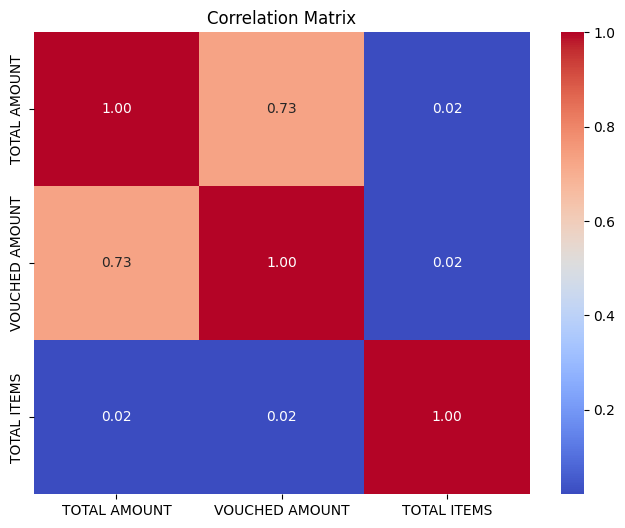

In [247]:
# Select only numeric columns
numeric_df = df_new.select_dtypes(include=['number'])

# Drop non-quantitative/categorical numeric fields
columns_to_drop = [
    'DOCUMENT NUMBER', 'REQUISITION NUMBER', 'DEPARTMENT NUMBER', 'COST CENTER',
    'DOCUMENT STATUS CODE', 'ITEM NUMBER', 'COMMODITY CODE', 'YEAR', 'MONTH', 'QUARTER'
]
quantitative_df = numeric_df.drop(columns=columns_to_drop, errors='ignore')

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(quantitative_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

strong positive correlation between total and vouched amount

very little correlation between total/vouched amount and total items

In [248]:
# create new column that shows difference between total amount and vouched amount
df_new['DIFFERENCE'] = df_new['TOTAL AMOUNT'] - df_new['VOUCHED AMOUNT']

# create column that shows pecentage of vouched amount from total amount
df_new['PERCENTAGE VOUCHED'] = (df_new['VOUCHED AMOUNT'] / df_new['TOTAL AMOUNT']) * 100

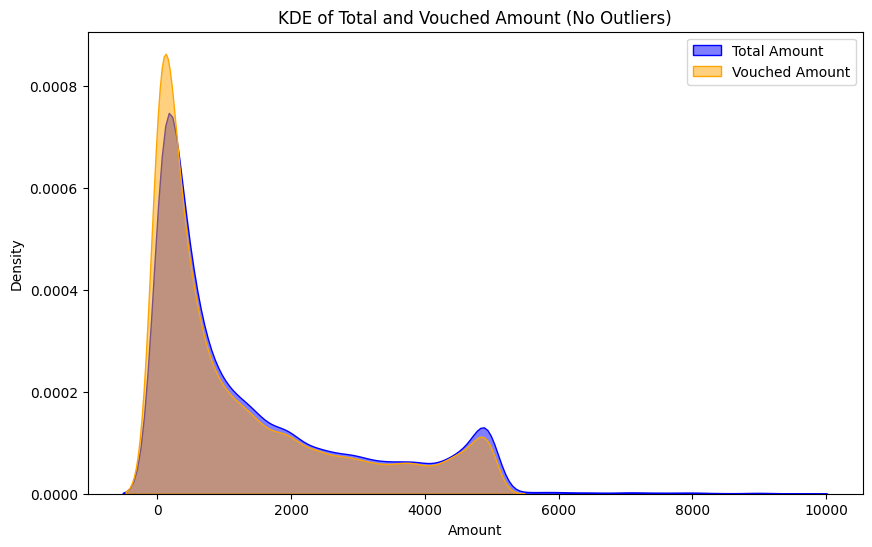

In [249]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for both columns
df_no_outliers = remove_outliers_iqr(df_new, 'TOTAL AMOUNT')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'VOUCHED AMOUNT')

# KDE plot without outliers
plt.figure(figsize=(10, 6))
sns.kdeplot(df_no_outliers['TOTAL AMOUNT'], label='Total Amount', fill=True, color='blue', alpha=0.5)
sns.kdeplot(df_no_outliers['VOUCHED AMOUNT'], label='Vouched Amount', fill=True, color='orange', alpha=0.5)
plt.title('KDE of Total and Vouched Amount (No Outliers)')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.show()


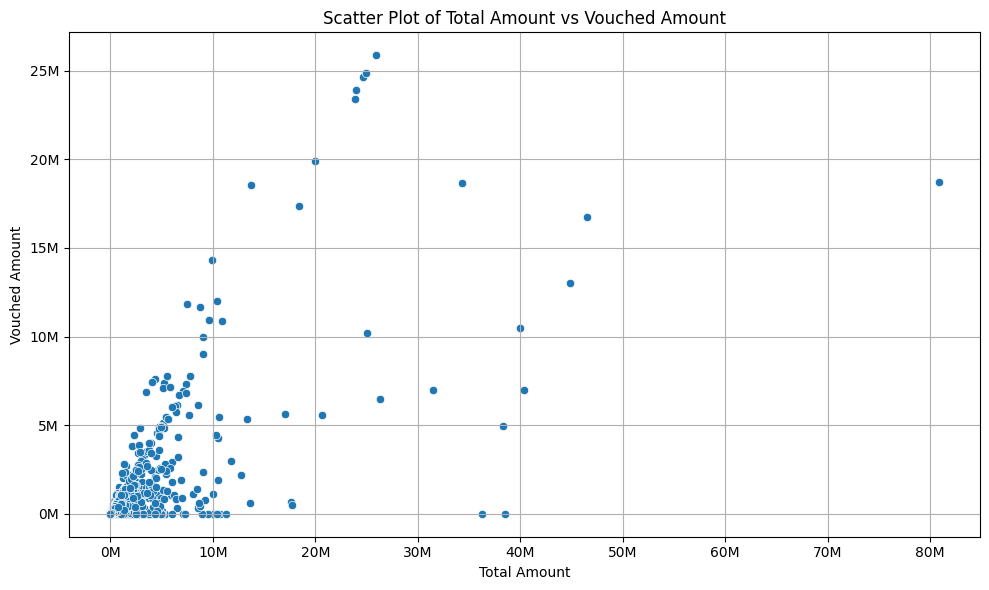

In [250]:
import matplotlib.ticker as ticker
# scatter plot between TOTAL AMOUNT and VOUCHED AMOUNT
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='TOTAL AMOUNT', y='VOUCHED AMOUNT')
plt.title('Scatter Plot of Total Amount vs Vouched Amount')
plt.xlabel('Total Amount')
plt.ylabel('Vouched Amount')
# label x-axis and y-axis with scale where it shows millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y/1e6)}M'))

# add grid
plt.grid(True)
plt.tight_layout()

plt.show()


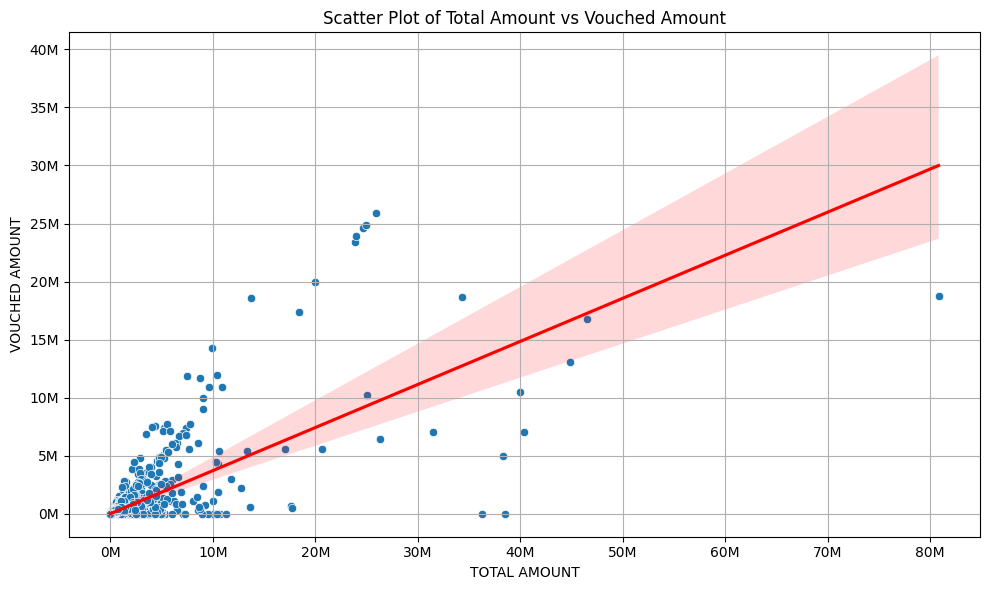

In [251]:
# scatter plot between TOTAL AMOUNT and VOUCHED AMOUNT
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='TOTAL AMOUNT', y='VOUCHED AMOUNT')
plt.title('Scatter Plot of Total Amount vs Vouched Amount')
plt.xlabel('Total Amount')
plt.ylabel('Vouched Amount')
# label x-axis and y-axis with scale where it shows millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y/1e6)}M'))

# add grid
plt.grid(True)
plt.tight_layout()

# line of best fit
sns.regplot(data=df_new, x='TOTAL AMOUNT', y='VOUCHED AMOUNT', scatter=False, color='red')
plt.tight_layout()
plt.show()


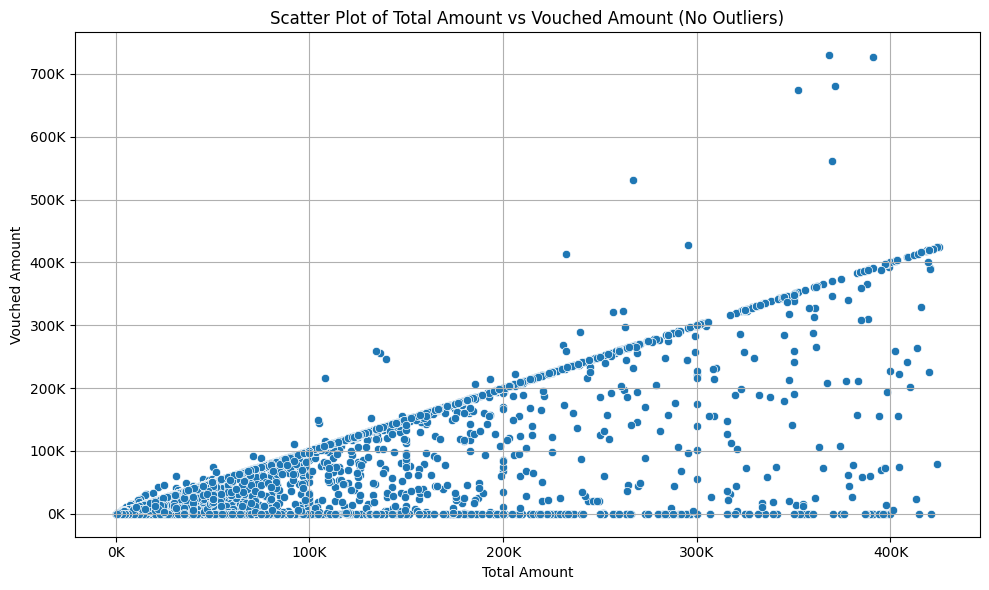

In [252]:
# remove outliers
q_low = df_new['TOTAL AMOUNT'].quantile(0.01)
q_high = df_new['TOTAL AMOUNT'].quantile(0.99)
df_no_outliers = df_new[(df_new['TOTAL AMOUNT'] > q_low) & (df_new['TOTAL AMOUNT'] < q_high)]
# scatter plot without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='TOTAL AMOUNT', y='VOUCHED AMOUNT')
plt.title('Scatter Plot of Total Amount vs Vouched Amount (No Outliers)')
plt.xlabel('Total Amount')
plt.ylabel('Vouched Amount')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y/1e3)}K'))
# add grid
plt.grid(True)
plt.tight_layout()
plt.show()

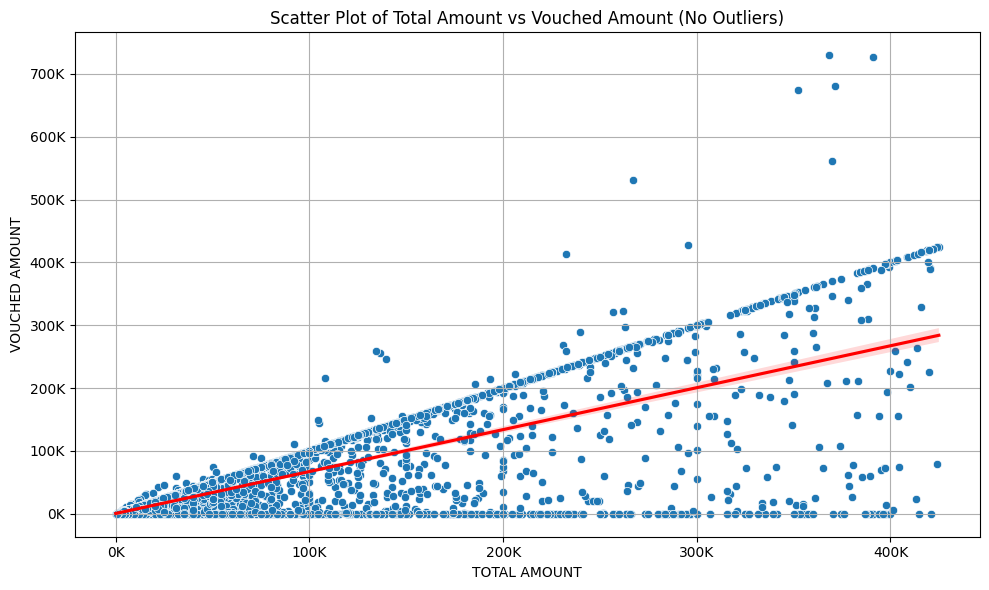

In [253]:
# remove outliers
q_low = df_new['TOTAL AMOUNT'].quantile(0.01)
q_high = df_new['TOTAL AMOUNT'].quantile(0.99)
df_no_outliers = df_new[(df_new['TOTAL AMOUNT'] > q_low) & (df_new['TOTAL AMOUNT'] < q_high)]
# scatter plot without outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='TOTAL AMOUNT', y='VOUCHED AMOUNT')
plt.title('Scatter Plot of Total Amount vs Vouched Amount (No Outliers)')
plt.xlabel('Total Amount')
plt.ylabel('Vouched Amount')
# label x-axis and y-axis with scale where it shows millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y/1e3)}K'))
# add grid
plt.grid(True)

# line of best fit
sns.regplot(data=df_no_outliers, x='TOTAL AMOUNT', y='VOUCHED AMOUNT', scatter=False, color='red')
plt.tight_layout()
plt.show()

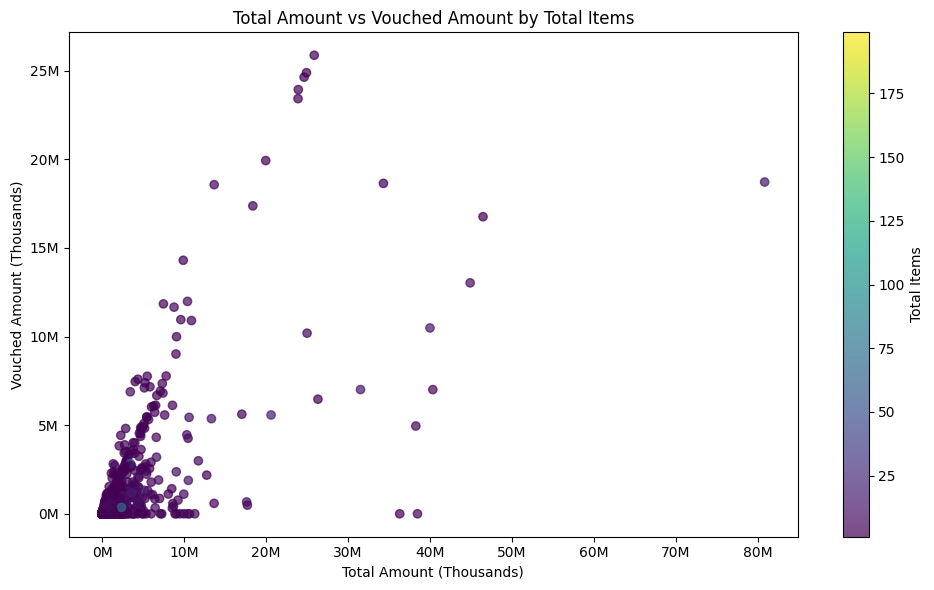

In [254]:
import matplotlib as mpl

# Ensure TOTAL ITEMS is numeric
df_new['TOTAL ITEMS'] = pd.to_numeric(df_new['TOTAL ITEMS'], errors='coerce')

# Create figure/axis
fig, ax = plt.subplots(figsize=(10, 6))

# Normalize TOTAL ITEMS for color mapping
norm = mpl.colors.Normalize(vmin=df_new['TOTAL ITEMS'].min(), vmax=df_new['TOTAL ITEMS'].max())
cmap = plt.cm.viridis

# Create scatter plot with continuous color mapping
sc = ax.scatter(
    df_new['TOTAL AMOUNT'],
    df_new['VOUCHED AMOUNT'],
    c=df_new['TOTAL ITEMS'],
    cmap=cmap,
    norm=norm,
    alpha=0.7
)

# Format axes labels and scales
ax.set_title('Total Amount vs Vouched Amount by Total Items')
ax.set_xlabel('Total Amount (Thousands)')
ax.set_ylabel('Vouched Amount (Thousands)')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y/1e6)}M'))

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Total Items')

plt.tight_layout()
plt.show()



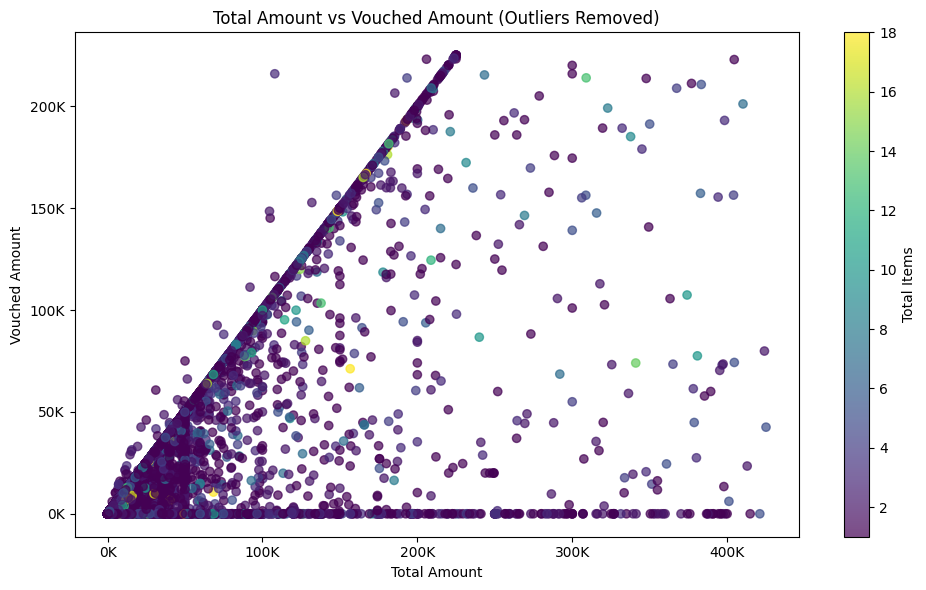

In [105]:
# Ensure numeric
df_new['TOTAL ITEMS'] = pd.to_numeric(df_new['TOTAL ITEMS'], errors='coerce')

# --- remove outliers (tweak the 0.01 / 0.99 thresholds if needed) ---
q = df_new[['TOTAL AMOUNT','VOUCHED AMOUNT','TOTAL ITEMS']].quantile([0.01, 0.99])
mask = (
    (df_new['TOTAL AMOUNT'].between(q.loc[0.01, 'TOTAL AMOUNT'], q.loc[0.99, 'TOTAL AMOUNT'])) &
    (df_new['VOUCHED AMOUNT'].between(q.loc[0.01, 'VOUCHED AMOUNT'], q.loc[0.99, 'VOUCHED AMOUNT'])) &
    (df_new['TOTAL ITEMS'].between(q.loc[0.01, 'TOTAL ITEMS'], q.loc[0.99, 'TOTAL ITEMS']))
)
df_f = df_new[mask].dropna(subset=['TOTAL AMOUNT','VOUCHED AMOUNT','TOTAL ITEMS'])

# --- plot with continuous colorbar ---
fig, ax = plt.subplots(figsize=(10,6))
norm = mpl.colors.Normalize(vmin=df_f['TOTAL ITEMS'].min(), vmax=df_f['TOTAL ITEMS'].max())
cmap = plt.cm.viridis

sc = ax.scatter(
    df_f['TOTAL AMOUNT'],
    df_f['VOUCHED AMOUNT'],
    c=df_f['TOTAL ITEMS'],
    cmap=cmap,
    norm=norm,
    alpha=0.7
)

ax.set_title('Total Amount vs Vouched Amount (Outliers Removed)')
ax.set_xlabel('Total Amount')
ax.set_ylabel('Vouched Amount')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}K'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y/1e3)}K'))

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Total Items')

plt.tight_layout()
plt.show()


In [256]:
df_new.columns

Index(['RECORD TYPE', 'DOCUMENT NUMBER', 'SOURCE DOCUMENT TYPE',
       'DOCUMENT DESCRIPTION', 'REQUISITION NUMBER', 'INPUT DATE',
       'TOTAL AMOUNT', 'DEPARTMENT NUMBER', 'DEPARTMENT NAME', 'COST CENTER',
       'COST CENTER NAME', 'DOCUMENT TYPE CODE', 'DOCUMENT TYPE DESCRIPTION',
       'DOCUMENT STATUS CODE', 'DOCUMENT STATUS DESCRIPTION', 'VOUCHED AMOUNT',
       'START DATE', 'EXPIRATION DATE', 'EXTENSION DATE', 'VENDOR NAME 1',
       'VENDOR CITY', 'VENDOR STATE', 'VENDOR ZIP', 'VENDOR TYPE', 'GENDER',
       'ETHNICITY', 'STATUS', 'CLASS', 'GEOGRAPHIC AREA',
       'INDEPENDENT CONTRACTOR', 'MINORITY', 'DISADVANTAGED',
       'DISABLED VETERAN', 'SB DISABLED VET', 'SB MINORITY',
       'SB MINORITY WOMAN', 'SB NON-MINORITY', 'SB DISADVANTAGED',
       'SB VETERAN', 'SB WOMAN', 'TOTAL ITEMS', 'ITEM NUMBER',
       'COMMODITY CODE', 'COMMODITY DESCRIPTION', 'AUTO-MAPPED CATEGORY',
       'YEAR', 'MONTH', 'YEARQUARTERDESC', 'QUARTER', 'FINAL CATEGORY',
       'DIFFERENCE', 'P

In [257]:
# --- 0) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Basic cleaning & dtypes (safe if re-run)
num_cols = ["TOTAL AMOUNT","VOUCHED AMOUNT","TOTAL ITEMS","DIFFERENCE","PERCENTAGE VOUCHED"]
date_cols = ["INPUT DATE","START DATE","EXPIRATION DATE","EXTENSION DATE"]

for c in num_cols:
    # coerce strings like "1,234.56" -> float
    df_new[c] = (
        pd.to_numeric(df_new[c].astype(str).str.replace(",","", regex=False)
                      .str.replace("$","", regex=False), errors="coerce")
    )

for c in date_cols:
    df_new[c] = pd.to_datetime(df_new[c], errors="coerce")

# Fallback: recompute engineered fields if missing/wrong
if df_new["DIFFERENCE"].isna().any():
    df_new["DIFFERENCE"] = df_new["TOTAL AMOUNT"] - df_new["VOUCHED AMOUNT"]

if df_new["PERCENTAGE VOUCHED"].isna().any():
    df_new["PERCENTAGE VOUCHED"] = np.where(
        df_new["TOTAL AMOUNT"] > 0,
        100.0 * df_new["VOUCHED AMOUNT"] / df_new["TOTAL AMOUNT"],
        np.nan
    )

# Calendar helpers
df_new["YEAR"]   = df_new["INPUT DATE"].dt.year
df_new["MONTH"]  = df_new["INPUT DATE"].dt.month
df_new["QUARTER"] = df_new["INPUT DATE"].dt.to_period("Q").astype(str)


In [258]:
df_new["FLAG_OVERVOUCHED"]  = df_new["PERCENTAGE VOUCHED"] > 100
df_new["FLAG_UNDERVOUCHED"] = (df_new["PERCENTAGE VOUCHED"] >= 0) & (df_new["PERCENTAGE VOUCHED"] < 100)
df_new["FLAG_ZERO_TOTAL"]   = (df_new["TOTAL AMOUNT"] <= 0) | df_new["TOTAL AMOUNT"].isna()

# Quick counts
anomaly_summary = df_new[["FLAG_OVERVOUCHED","FLAG_UNDERVOUCHED","FLAG_ZERO_TOTAL"]].mean().sort_values(ascending=False)
print(anomaly_summary)


FLAG_UNDERVOUCHED    0.211705
FLAG_OVERVOUCHED     0.003464
FLAG_ZERO_TOTAL      0.000000
dtype: float64


In [259]:
dept_agg = (
    df_new.groupby("DEPARTMENT NAME", dropna=False)
          .agg(total_spend=("TOTAL AMOUNT","sum"),
               total_vouched=("VOUCHED AMOUNT","sum"),
               items=("TOTAL ITEMS","sum"),
               n_docs=("DOCUMENT NUMBER","nunique"),
               n_over=("FLAG_OVERVOUCHED","sum"),
               pct_over=("FLAG_OVERVOUCHED","mean"))
          .assign(remaining=lambda d: d.total_spend - d.total_vouched)
          .sort_values("total_spend", ascending=False)
)

print(dept_agg.head(10))


                    total_spend  total_vouched    items  n_docs  n_over  \
DEPARTMENT NAME                                                           
ENV SERV           1.026468e+09   5.676066e+08  25949.0   10330      39   
TRAN & DRAIN       6.612577e+08   1.955915e+08   5334.0    1954      21   
COMMUNITY DEVELOP  1.795592e+08   8.393332e+07   1552.0     758      12   
BLDG&GROUND        1.390019e+08   7.401992e+07  16865.0    6218      47   
AIRPORT            1.253346e+08   8.173171e+07   2153.0     954       9   
LIBRARY            1.013690e+08   6.885372e+07   9877.0    2544      20   
FLEET              1.002949e+08   8.743419e+07  61952.0   28179      23   
FINANCE            8.176409e+07   4.763091e+07   4639.0    1140       2   
EMS                7.954007e+07   6.338815e+07  12340.0    4826       1   
POLICE             7.396734e+07   5.993042e+07  11145.0    3694       5   

                   pct_over     remaining  
DEPARTMENT NAME                            
ENV SERV   

In [260]:
vendor_agg = (
    df_new.groupby("VENDOR NAME 1", dropna=False)
          .agg(total_spend=("TOTAL AMOUNT","sum"),
               total_vouched=("VOUCHED AMOUNT","sum"),
               n_docs=("DOCUMENT NUMBER","nunique"),
               pct_over=("FLAG_OVERVOUCHED","mean"))
          .assign(remaining=lambda d: d.total_spend - d.total_vouched)
          .sort_values(["pct_over","total_spend"], ascending=[False, False])
)

top_over_vendors = vendor_agg.query("n_docs >= 5").head(15)  # require volume
print(top_over_vendors)


                                          total_spend  total_vouched  n_docs  \
VENDOR NAME 1                                                                  
FORBY CONTRACTING INC                      8269348.03     4920367.17       6   
C-K ASSOCIATES LLC                          229469.74      257436.24       7   
C & S BUILDING SUPPLY INC /                  11707.61        9306.83      11   
COMMAND CONSTRUCTION INDUSTRIES LLC       22647227.51     9373656.42       8   
BOB BERNHARD & ASSOCIATES MECHANICAL LLC   8253429.00     4188951.15       5   
ARRIGHI CONSTRUCTION LLC                   6580882.32     4794805.90       5   
TURNKEY RESIDENTIAL CONST LLC               380557.18      175260.00      25   
AXIELL ALM INC                              340213.92      340213.93       5   
BRISTOL BAY NATIVE CORPORATION              135129.70      133129.20       5   
BAKER PRINTING CO INC                        15956.05       15956.07      11   
HARD ROCK CONSTRUCTION LLC              

In [261]:
cat_agg = (
    df_new.groupby("FINAL CATEGORY", dropna=False)
          .agg(total_spend=("TOTAL AMOUNT","sum"),
               total_vouched=("VOUCHED AMOUNT","sum"),
               remaining=("DIFFERENCE","sum"),
               n_docs=("DOCUMENT NUMBER","nunique"))
          .assign(pct_vouched=lambda d: 100*np.where(d.total_spend>0, d.total_vouched/d.total_spend, np.nan))
          .sort_values("total_spend", ascending=False)
)
print(cat_agg.head(10))


                                 total_spend  total_vouched     remaining  \
FINAL CATEGORY                                                              
Summary Record (No Detail)      2.119141e+09   9.504385e+08  1.168703e+09   
Construction & Maintenance      4.409510e+08   2.699086e+08  1.710424e+08   
Transportation                  1.259132e+08   1.106569e+08  1.525631e+07   
Technology & Electrical         6.964035e+07   6.519442e+07  4.445935e+06   
Agriculture & Environment       2.970911e+07   2.875295e+07  9.561586e+05   
Professional & Social Services  2.868877e+07   1.773077e+07  1.095800e+07   
Office & Printing               2.639252e+07   2.456560e+07  1.826918e+06   
Security & Safety               2.546160e+07   2.045094e+07  5.010657e+06   
Health & Medical                2.543474e+07   2.356674e+07  1.868001e+06   
Industrial & Chemicals          1.931977e+07   1.700941e+07  2.310359e+06   

                                n_docs  pct_vouched  
FINAL CATEGORY       

   YEAR  TOTAL AMOUNT  VOUCHED AMOUNT
0  2017  3.827546e+08    3.360682e+08
1  2018  5.218428e+08    2.032145e+08
2  2019  3.746173e+08    1.491585e+08
3  2020  2.578415e+08    1.385387e+08
4  2021  3.119334e+08    1.582654e+08
5  2022  3.779166e+08    1.903667e+08
6  2023  2.924900e+08    1.662235e+08
7  2024  2.816791e+08    1.789216e+08
8  2025  1.541184e+08    4.331161e+07


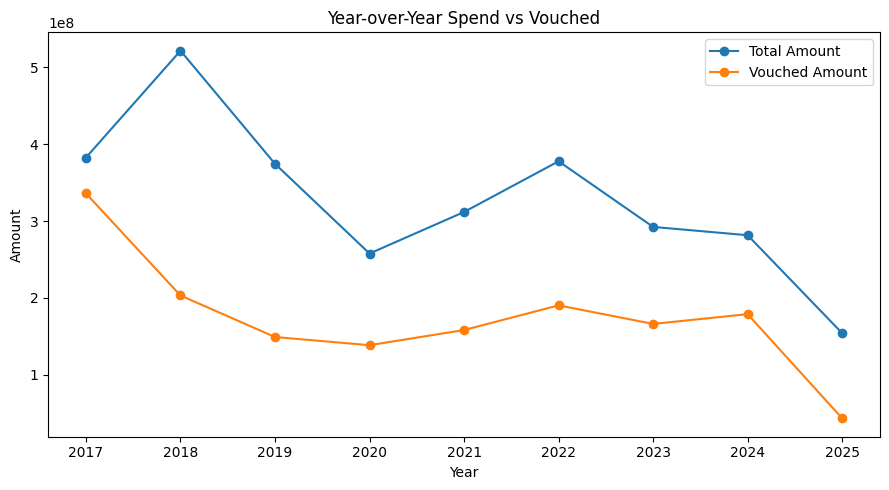

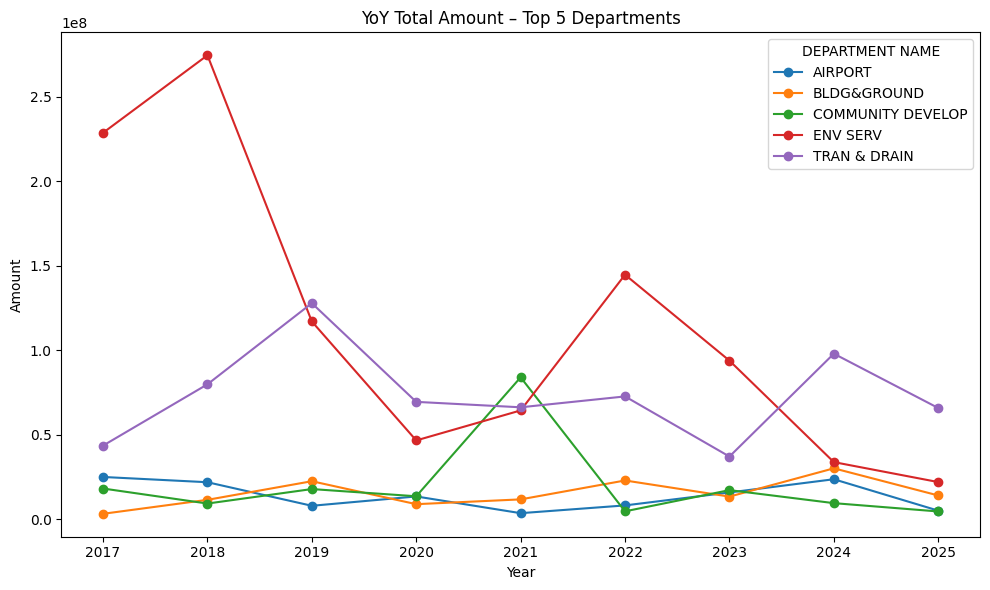

In [ ]:
yoy = (
    df_new
    .groupby("YEAR", dropna=False)[["TOTAL AMOUNT","VOUCHED AMOUNT"]]
    .sum()
    .reset_index()
    .sort_values("YEAR")
)
print(yoy)

# Simple line plot
plt.figure(figsize=(9,5))
plt.plot(yoy["YEAR"], yoy["TOTAL AMOUNT"], marker="o", label="Total Amount")
plt.plot(yoy["YEAR"], yoy["VOUCHED AMOUNT"], marker="o", label="Vouched Amount")
plt.title("Year-over-Year Spend vs Vouched")
plt.xlabel("Year"); plt.ylabel("Amount")
plt.legend(); plt.tight_layout(); plt.show()

# Per-department YoY
top5_depts = dept_agg.head(5).index
yoy_dept = (
    df_new[df_new["DEPARTMENT NAME"].isin(top5_depts)]
    .groupby(["YEAR","DEPARTMENT NAME"])[["TOTAL AMOUNT"]]
    .sum()
    .reset_index()
    .pivot(index="YEAR", columns="DEPARTMENT NAME", values="TOTAL AMOUNT")
    .fillna(0.0)
)
yoy_dept.plot(figsize=(10,6), marker="o", title="YoY Total Amount – Top 5 Departments")
plt.xlabel("Year"); plt.ylabel("Amount"); plt.tight_layout(); plt.show()


<Figure size 1200x600 with 0 Axes>

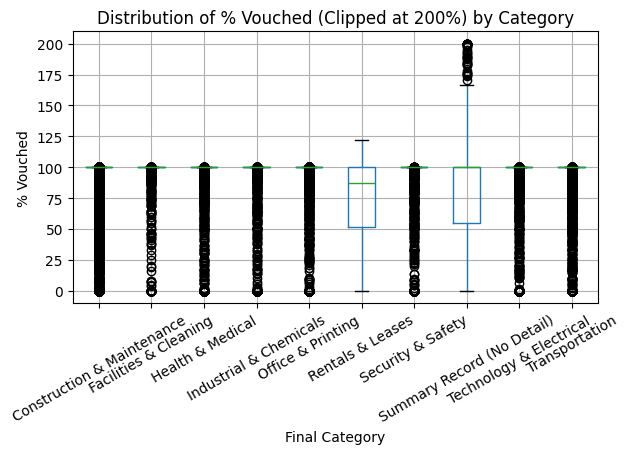

In [263]:
# Clip % to a reasonable band for viz; keep raw in the data
df_new["PCT_VOUCHED_CLIPPED"] = df_new["PERCENTAGE VOUCHED"].clip(0, 200)

# Boxplot by category (top 10 by volume)
top10_cats = (df_new["FINAL CATEGORY"].value_counts().head(10)).index
subset = df_new[df_new["FINAL CATEGORY"].isin(top10_cats)]

plt.figure(figsize=(12,6))
# Using pandas boxplot to avoid seaborn
subset.boxplot(column="PCT_VOUCHED_CLIPPED", by="FINAL CATEGORY", rot=30)
plt.suptitle("")
plt.title("Distribution of % Vouched (Clipped at 200%) by Category")
plt.xlabel("Final Category"); plt.ylabel("% Vouched"); plt.tight_layout(); plt.show()


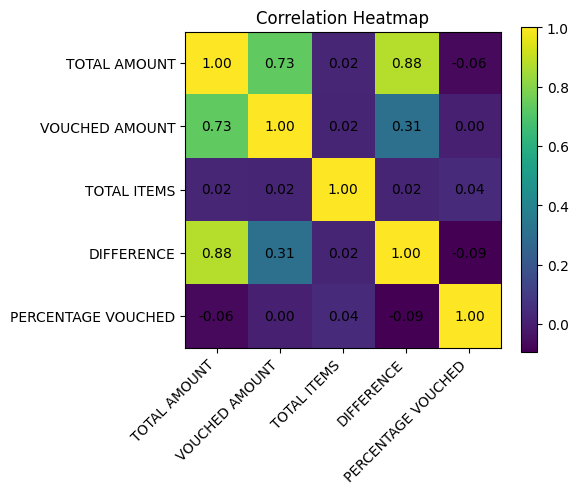

In [264]:
num_for_corr = df_new[["TOTAL AMOUNT","VOUCHED AMOUNT","TOTAL ITEMS","DIFFERENCE","PERCENTAGE VOUCHED"]].copy()
corr = num_for_corr.corr(numeric_only=True)

plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(corr.shape[1]), corr.columns, rotation=45, ha="right")
plt.yticks(range(corr.shape[0]), corr.index)
plt.title("Correlation Heatmap")
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha="center", va="center")
plt.colorbar(); plt.tight_layout(); plt.show()


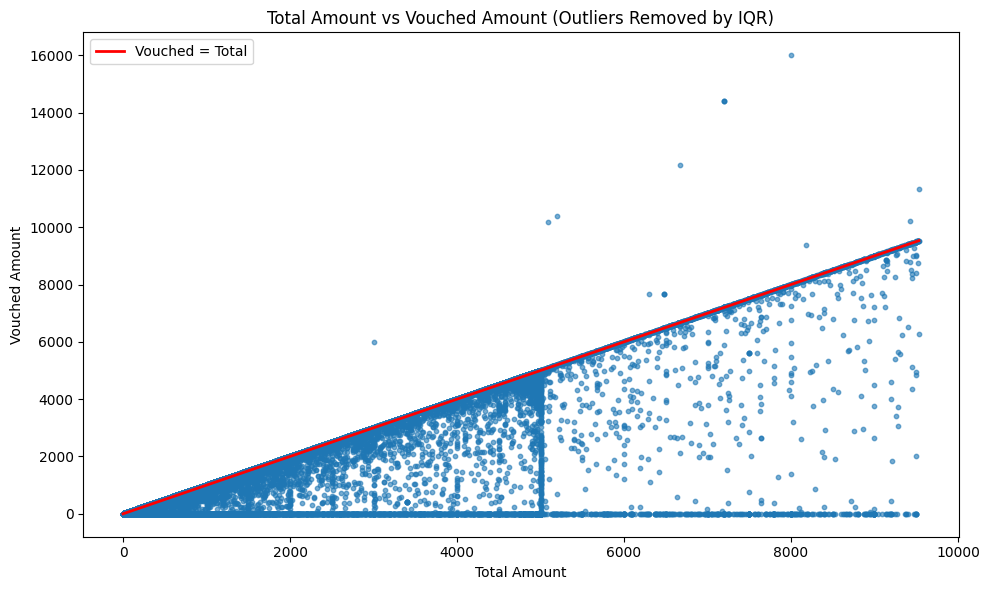

In [265]:
# IQR filter for 'TOTAL AMOUNT' (keeps bulk for readability)
Q1, Q3 = df_new["TOTAL AMOUNT"].quantile([0.25, 0.75])
IQR = Q3 - Q1
mask = (df_new["TOTAL AMOUNT"] >= (Q1 - 1.5*IQR)) & (df_new["TOTAL AMOUNT"] <= (Q3 + 1.5*IQR))
df_scatter = df_new[mask].copy()

plt.figure(figsize=(10,6))
plt.scatter(df_scatter["TOTAL AMOUNT"], df_scatter["VOUCHED AMOUNT"], s=10, alpha=0.6)
# 45-degree line for fully vouched
m = np.array([df_scatter["TOTAL AMOUNT"].min(), df_scatter["TOTAL AMOUNT"].max()])
plt.plot(m, m, "r-", linewidth=2, label="Vouched = Total")
plt.title("Total Amount vs Vouched Amount (Outliers Removed by IQR)")
plt.xlabel("Total Amount"); plt.ylabel("Vouched Amount"); plt.legend(); plt.tight_layout(); plt.show()


In [ ]:
import numpy as np
import pandas as pd

H = df_new.loc[df_new["RECORD TYPE"]=="H"].copy()

for c in ["TOTAL AMOUNT","VOUCHED AMOUNT","TOTAL ITEMS"]:
    H.loc[:, c] = pd.to_numeric(H[c], errors="coerce")

H.loc[:, "INPUT DATE"] = pd.to_datetime(H["INPUT DATE"], errors="coerce")

if "ITEM TOTAL COST" in df_new.columns:
    D = df_new.loc[df_new["RECORD TYPE"]=="D", ["DOCUMENT NUMBER","ITEM TOTAL COST"]].copy()
    D["ITEM TOTAL COST"] = pd.to_numeric(D["ITEM TOTAL COST"], errors="coerce")
    doc_detail_sum = D.groupby("DOCUMENT NUMBER", dropna=False)["ITEM TOTAL COST"].sum().rename("DETAIL_SUM")
    H = H.merge(doc_detail_sum, on="DOCUMENT NUMBER", how="left")
    H["HEADER_VS_DETAIL_DIFF"] = H["TOTAL AMOUNT"] - H["DETAIL_SUM"]

EPS = 0.01
H["DIFFERENCE"] = H["TOTAL AMOUNT"] - H["VOUCHED AMOUNT"]
H["PERCENTAGE VOUCHED"] = np.where(H["TOTAL AMOUNT"]>0,
                                   100.0*H["VOUCHED AMOUNT"]/H["TOTAL AMOUNT"],
                                   np.nan)

H["FLAG_OVERVOUCHED"]  = H["VOUCHED AMOUNT"] > (H["TOTAL AMOUNT"] + EPS)
H["FLAG_NEAR_100"]     = (~H["FLAG_OVERVOUCHED"]) & (H["PERCENTAGE VOUCHED"].between(100, 100.2))
H["FLAG_UNDERVOUCHED"] = (H["TOTAL AMOUNT"]>0) & (H["VOUCHED AMOUNT"] < (H["TOTAL AMOUNT"] - EPS))
H["FLAG_ZERO_TOTAL"]   = (H["TOTAL AMOUNT"]<=0) | H["TOTAL AMOUNT"].isna()

def reason(row):
    if row["FLAG_ZERO_TOTAL"]:
        return "Zero/Null total"
    if row["FLAG_OVERVOUCHED"]:
        return "Over > 100%"
    if row["FLAG_NEAR_100"]:
        return "≈100% (rounding)"
    if row["FLAG_UNDERVOUCHED"]:
        return "Under < 100%"
    return "OK"
H["ANOMALY_REASON"] = H.apply(reason, axis=1)

is_summary = H["FINAL CATEGORY"].eq("Summary Record (No Detail)")
H_nosum = H.loc[~is_summary].copy()     
H_sum   = H.loc[is_summary].copy() 

dept_agg = (
    H_nosum.groupby("DEPARTMENT NAME", dropna=False)
            .agg(total_spend=("TOTAL AMOUNT","sum"),
                 total_vouched=("VOUCHED AMOUNT","sum"),
                 n_docs=("DOCUMENT NUMBER","nunique"),
                 n_over=("FLAG_OVERVOUCHED","sum"),
                 pct_over=("FLAG_OVERVOUCHED","mean"))
            .assign(remaining=lambda d: d.total_spend - d.total_vouched)
            .sort_values("total_spend", ascending=False)
)

vendor_agg = (
    H_nosum.groupby("VENDOR NAME 1", dropna=False)
            .agg(total_spend=("TOTAL AMOUNT","sum"),
                 total_vouched=("VOUCHED AMOUNT","sum"),
                 n_docs=("DOCUMENT NUMBER","nunique"),
                 n_over=("FLAG_OVERVOUCHED","sum"),
                 pct_over=("FLAG_OVERVOUCHED","mean"))
            .assign(remaining=lambda d: d.total_spend - d.total_vouched)
            .query("n_docs >= 5")
            .sort_values(["pct_over","total_spend"], ascending=[False, False])
)

cat_agg = (
    H_nosum.groupby("FINAL CATEGORY", dropna=False)
            .agg(total_spend=("TOTAL AMOUNT","sum"),
                 total_vouched=("VOUCHED AMOUNT","sum"),
                 remaining=("DIFFERENCE","sum"),
                 n_docs=("DOCUMENT NUMBER","nunique"))
            .assign(pct_vouched=lambda d: 100*np.where(d.total_spend>0, d.total_vouched/d.total_spend, np.nan))
            .sort_values("total_spend", ascending=False)
)

H_nosum["YEAR"] = H_nosum["INPUT DATE"].dt.year
yoy = (H_nosum.groupby("YEAR")[["TOTAL AMOUNT","VOUCHED AMOUNT"]]
               .sum().reset_index().sort_values("YEAR"))

kpis = {
    "docs": int(H.shape[0]),
    "docs_excl_summary": int(H_nosum.shape[0]),
    "pct_over_vouched": H["FLAG_OVERVOUCHED"].mean(),
    "pct_near_100": H["FLAG_NEAR_100"].mean(),
    "total_remaining": float((H_nosum["TOTAL AMOUNT"] - H_nosum["VOUCHED AMOUNT"]).sum()),
}

print("KPIs:", {k: (f"{v:,.2%}" if 'pct' in k else f"{v:,.0f}") for k,v in kpis.items()})
print("\nTop departments by spend:\n", dept_agg.head(10))
print("\nTop vendors by pct_over (n_docs>=5):\n", vendor_agg.head(15))
print("\nCategories by spend:\n", cat_agg.head(10))
print("\nYoY totals:\n", yoy)


KPIs: {'docs': '81,401', 'docs_excl_summary': '67,747', 'pct_over_vouched': '0.20%', 'pct_near_100': '78.13%', 'total_remaining': '222,421,924'}

Top departments by spend:
                        total_spend  total_vouched  n_docs  n_over  pct_over  \
DEPARTMENT NAME                                                               
ENV SERV              3.416638e+08   2.150546e+08    8916       1  0.000112   
FLEET                 9.307494e+07   8.290315e+07   26547      11  0.000414   
POLICE                5.838538e+07   5.222306e+07    3297       1  0.000303   
EMS                   4.915977e+07   4.418604e+07    4631       0  0.000000   
LIBRARY               4.436763e+07   2.891933e+07    2008       7  0.003486   
BLDG&GROUND           3.895367e+07   3.255890e+07    5845      15  0.002566   
TRAN & DRAIN          2.804127e+07   1.680217e+07     880       0  0.000000   
FIRE                  2.183087e+07   1.887534e+07     260       0  0.000000   
INFORMATION SERVICES  1.953326e+07   

--------------------------

KPI SUMMARY: {'docs': '81,401', 'docs_excl_summary': '67,747', 'pct_over_vouched': '0.20%', 'pct_near_100': '78.13%', 'total_remaining': '222,421,924'}


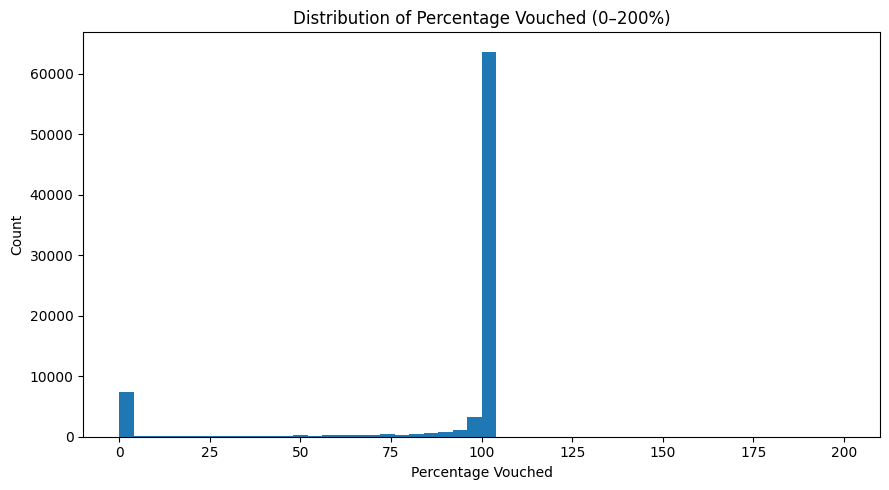

<Figure size 640x480 with 0 Axes>

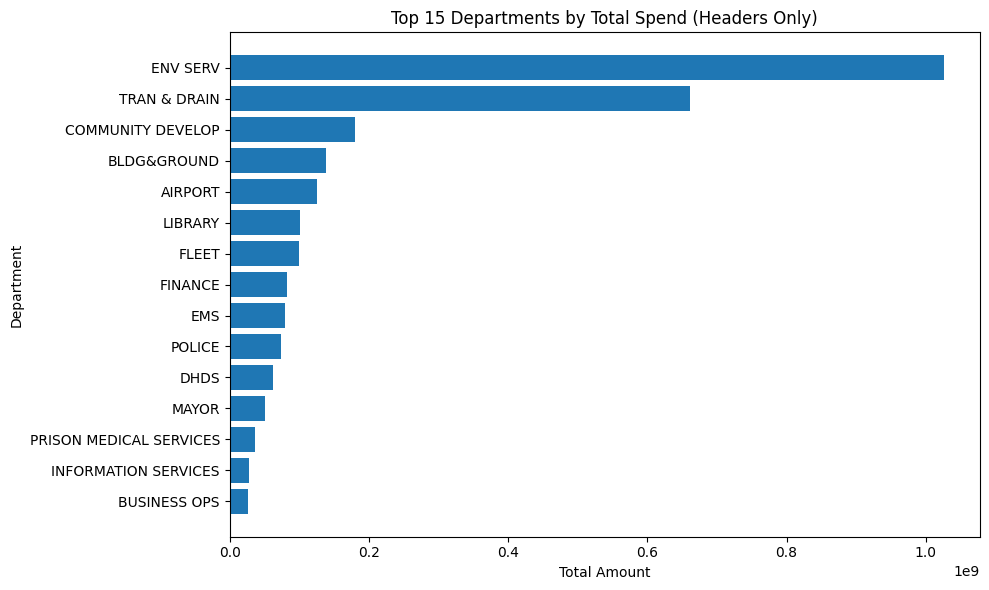

<Figure size 640x480 with 0 Axes>

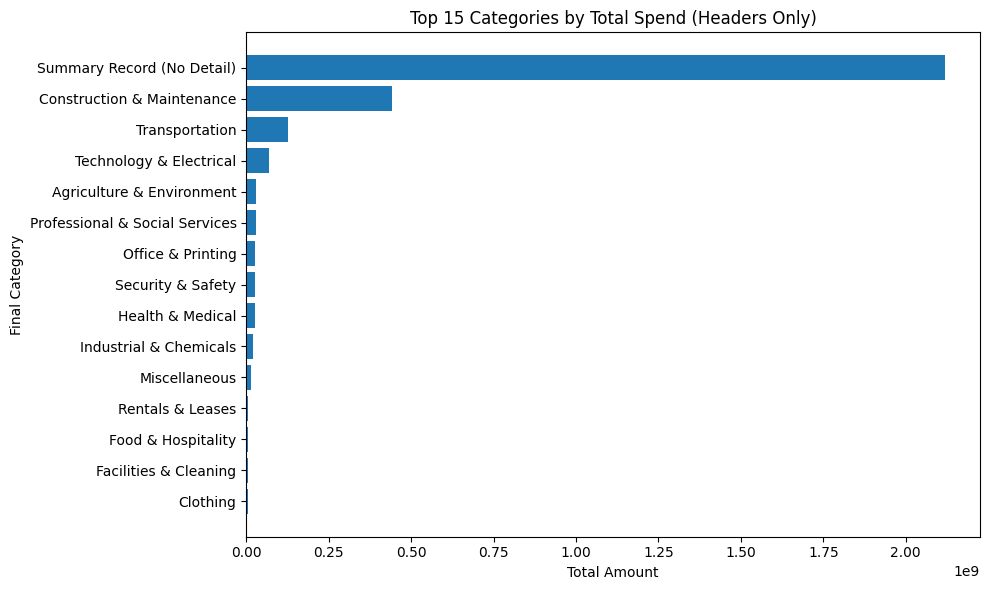

<Figure size 640x480 with 0 Axes>

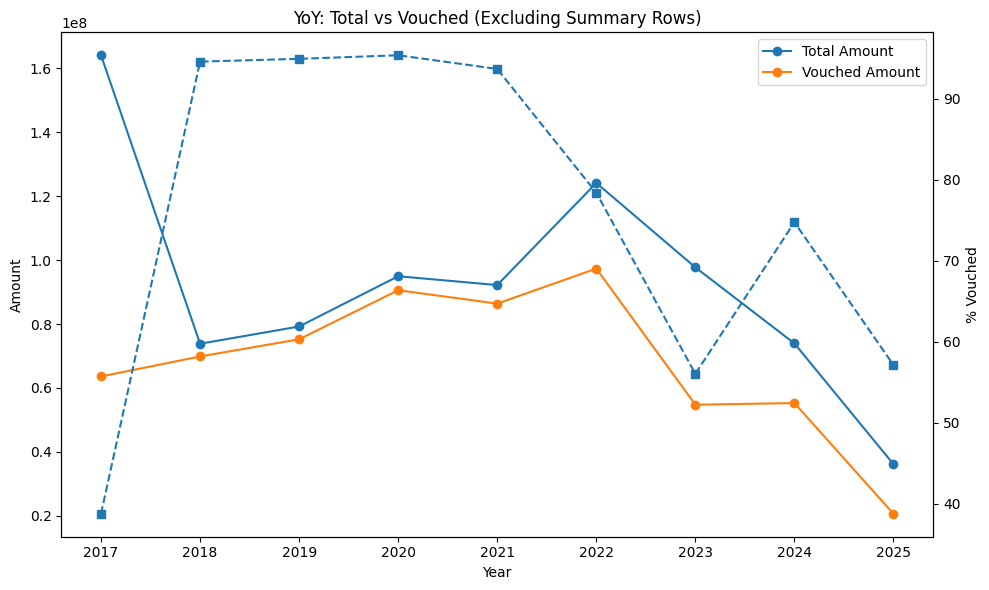

<Figure size 640x480 with 0 Axes>

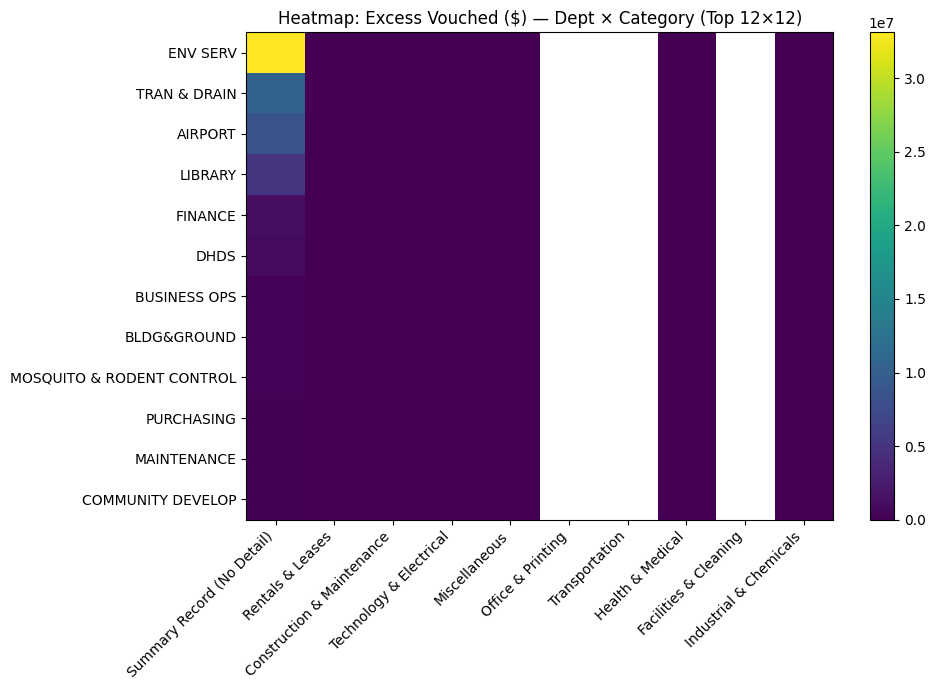

<Figure size 640x480 with 0 Axes>

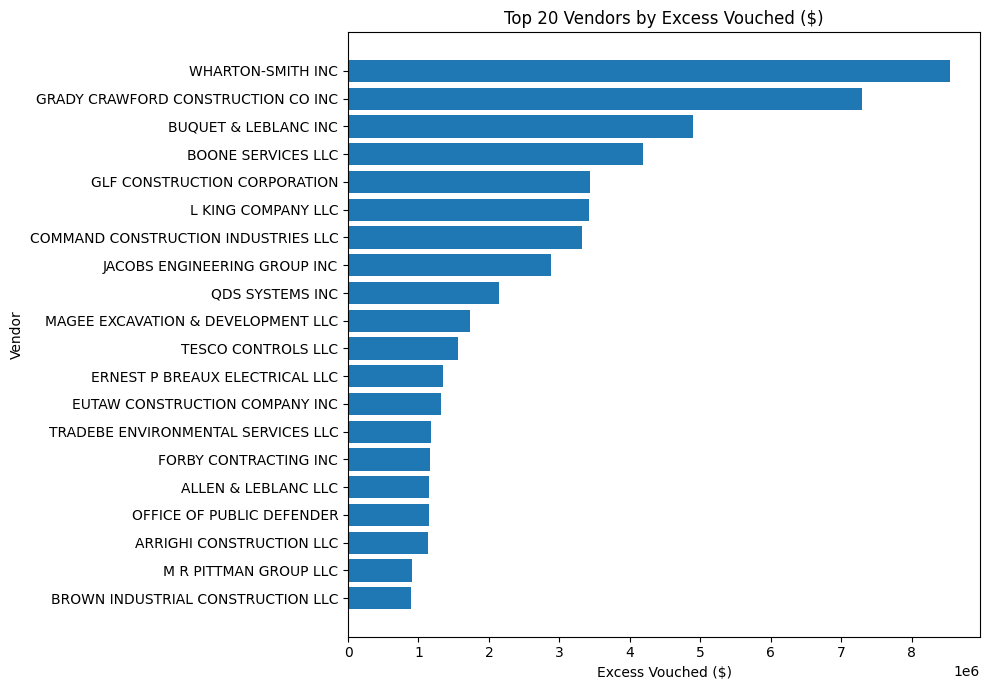

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def build_visuals_from_df(df_new, outdir="figs", show=True, save=True):
    if save and outdir:
        os.makedirs(outdir, exist_ok=True)

    H = df_new.loc[df_new["RECORD TYPE"]=="H"].copy()

    # numerics & dates
    for c in ["TOTAL AMOUNT","VOUCHED AMOUNT","TOTAL ITEMS"]:
        if c in H.columns:
            H[c] = pd.to_numeric(H[c], errors="coerce")
    H["INPUT DATE"] = pd.to_datetime(H["INPUT DATE"], errors="coerce")

    EPS = 0.01
    H["DIFFERENCE"] = H["TOTAL AMOUNT"] - H["VOUCHED AMOUNT"]
    H["PERCENTAGE VOUCHED"] = np.where(
        H["TOTAL AMOUNT"]>0, 100.0*H["VOUCHED AMOUNT"]/H["TOTAL AMOUNT"], np.nan
    )
    H["FLAG_OVERVOUCHED"]  = H["VOUCHED AMOUNT"] > (H["TOTAL AMOUNT"] + EPS)
    H["FLAG_NEAR_100"]     = (~H["FLAG_OVERVOUCHED"]) & (H["PERCENTAGE VOUCHED"].between(100, 100.2))
    H["FLAG_UNDERVOUCHED"] = (H["TOTAL AMOUNT"]>0) & (H["VOUCHED AMOUNT"] < (H["TOTAL AMOUNT"] - EPS))

    if "FINAL CATEGORY" in H.columns:
        H["IS_SUMMARY_ROW"] = H["FINAL CATEGORY"].astype(str).eq("Summary Record (No Detail)")
    else:
        H["IS_SUMMARY_ROW"] = False

    H["YEAR"] = H["INPUT DATE"].dt.year
    H["QUARTER"] = H["INPUT DATE"].dt.quarter

    kpis = {
        "docs": f"{len(H):,}",
        "docs_excl_summary": f"{int((~H['IS_SUMMARY_ROW']).sum()):,}",
        "pct_over_vouched": f"{H['FLAG_OVERVOUCHED'].mean():.2%}",
        "pct_near_100": f"{H['FLAG_NEAR_100'].mean():.2%}",
        "total_remaining": f"{H.loc[~H['IS_SUMMARY_ROW'],'DIFFERENCE'].sum():,.0f}",
    }
    print("KPI SUMMARY:", kpis)

    figs = {}
    files = {}

    # helper to optionally save + show
    def _finalize(name):
        if save and outdir:
            path = os.path.join(outdir, f"{name}.png")
            plt.tight_layout()
            plt.savefig(path, dpi=150)
            files[name] = path
        if show:
            plt.show()
        else:
            plt.close()
        figs[name] = plt.gcf()

    plt.figure(figsize=(9,5))
    series = H["PERCENTAGE VOUCHED"].dropna()
    series = series[(series>=0) & (series<=200)]
    plt.hist(series, bins=50)
    plt.title("Distribution of Percentage Vouched (0–200%)")
    plt.xlabel("Percentage Vouched"); plt.ylabel("Count")
    _finalize("hist_pct_vouched")

    dept = (H.groupby("DEPARTMENT NAME", dropna=False)["TOTAL AMOUNT"].sum()
              .sort_values(ascending=False).head(15))
    plt.figure(figsize=(10,6))
    plt.barh(dept.index.astype(str), dept.values)
    plt.gca().invert_yaxis()
    plt.title("Top 15 Departments by Total Spend (Headers Only)")
    plt.xlabel("Total Amount"); plt.ylabel("Department")
    _finalize("bar_top_departments_spend")

    if "FINAL CATEGORY" in H.columns:
        cat = (H.groupby("FINAL CATEGORY", dropna=False)["TOTAL AMOUNT"].sum()
                 .sort_values(ascending=False).head(15))
        plt.figure(figsize=(10,6))
        plt.barh(cat.index.astype(str), cat.values)
        plt.gca().invert_yaxis()
        plt.title("Top 15 Categories by Total Spend (Headers Only)")
        plt.xlabel("Total Amount"); plt.ylabel("Final Category")
        _finalize("bar_top_categories_spend")

    yoy = (H.loc[~H["IS_SUMMARY_ROW"]]
             .groupby("YEAR")[["TOTAL AMOUNT","VOUCHED AMOUNT"]]
             .sum().reset_index().sort_values("YEAR"))
    plt.figure(figsize=(10,6))
    ax1 = plt.gca()
    ax1.plot(yoy["YEAR"], yoy["TOTAL AMOUNT"], marker="o", label="Total Amount")
    ax1.plot(yoy["YEAR"], yoy["VOUCHED AMOUNT"], marker="o", label="Vouched Amount")
    ax1.set_xlabel("Year"); ax1.set_ylabel("Amount")
    ax1.set_title("YoY: Total vs Vouched (Excluding Summary Rows)")
    ax1.legend()
    pct_v = np.where(yoy["TOTAL AMOUNT"]>0, 100.0*yoy["VOUCHED AMOUNT"]/yoy["TOTAL AMOUNT"], np.nan)
    ax2 = ax1.twinx()
    ax2.plot(yoy["YEAR"], pct_v, marker="s", linestyle="--", label="% Vouched")
    ax2.set_ylabel("% Vouched")
    _finalize("line_yoy_total_v_vouched_pct")

    over = H.loc[H["FLAG_OVERVOUCHED"]].copy()
    over["EXCESS_VOUCHED"] = (over["VOUCHED AMOUNT"] - over["TOTAL AMOUNT"]).clip(lower=0)
    if not over.empty and "FINAL CATEGORY" in over.columns:
        top_depts = (over.groupby("DEPARTMENT NAME")["EXCESS_VOUCHED"].sum()
                        .sort_values(ascending=False).head(12)).index.tolist()
        top_cats = (over.groupby("FINAL CATEGORY")["EXCESS_VOUCHED"].sum()
                       .sort_values(ascending=False).head(12)).index.tolist()
        grid = (over.loc[over["DEPARTMENT NAME"].isin(top_depts) & over["FINAL CATEGORY"].isin(top_cats)]
                    .pivot_table(index="DEPARTMENT NAME", columns="FINAL CATEGORY",
                                 values="EXCESS_VOUCHED", aggfunc="sum", fill_value=0.0)
                    .reindex(index=top_depts, columns=top_cats))
        plt.figure(figsize=(10,7))
        plt.imshow(grid.values, aspect="auto")
        plt.xticks(range(len(grid.columns)), grid.columns, rotation=45, ha="right")
        plt.yticks(range(len(grid.index)), grid.index)
        plt.title("Heatmap: Excess Vouched ($) — Dept × Category (Top 12×12)")
        plt.colorbar()
        _finalize("heatmap_excess_over_100_dept_category")

    if not over.empty:
        ven = (over.groupby("VENDOR NAME 1", dropna=False)["EXCESS_VOUCHED"].sum()
                 .sort_values(ascending=False).head(20))
        plt.figure(figsize=(10,7))
        plt.barh(ven.index.astype(str), ven.values)
        plt.gca().invert_yaxis()
        plt.title("Top 20 Vendors by Excess Vouched ($)")
        plt.xlabel("Excess Vouched ($)"); plt.ylabel("Vendor")
        _finalize("bar_top_vendors_excess")

    return H, figs, files

H, figs, files = build_visuals_from_df(df_new, outdir="figs", show=True, save=True)


In [ ]:
import numpy as np
import pandas as pd

def build_unified_csv(df_new, outfile="unified_purchase_orders.csv"):
    H = df_new.loc[df_new["RECORD TYPE"]=="H"].copy()

    num_cols = ["TOTAL AMOUNT", "VOUCHED AMOUNT", "TOTAL ITEMS"]
    for c in num_cols:
        if c in H.columns:
            H[c] = pd.to_numeric(H[c], errors="coerce")

    # Dates
    H["INPUT DATE"] = pd.to_datetime(H["INPUT DATE"], errors="coerce")
    H["START DATE"] = pd.to_datetime(H["START DATE"], errors="coerce")
    H["EXPIRATION DATE"] = pd.to_datetime(H["EXPIRATION DATE"], errors="coerce")

    EPS = 0.01
    H["DIFFERENCE"] = H["TOTAL AMOUNT"] - H["VOUCHED AMOUNT"]
    H["PERCENTAGE VOUCHED"] = np.where(
        H["TOTAL AMOUNT"] > 0,
        100.0 * H["VOUCHED AMOUNT"] / H["TOTAL AMOUNT"],
        np.nan
    )

    H["FLAG_OVERVOUCHED"]  = H["VOUCHED AMOUNT"] > (H["TOTAL AMOUNT"] + EPS)
    H["FLAG_NEAR_100"]     = (~H["FLAG_OVERVOUCHED"]) & (H["PERCENTAGE VOUCHED"].between(100, 100.2))
    H["FLAG_UNDERVOUCHED"] = (H["TOTAL AMOUNT"] > 0) & (H["VOUCHED AMOUNT"] < (H["TOTAL AMOUNT"] - EPS))

    if "FINAL CATEGORY" in H.columns:
        H["IS_SUMMARY_ROW"] = H["FINAL CATEGORY"].astype(str).eq("Summary Record (No Detail)")
    else:
        H["IS_SUMMARY_ROW"] = False

    # Time fields
    H["YEAR"] = H["INPUT DATE"].dt.year
    H["MONTH"] = H["INPUT DATE"].dt.month
    H["QUARTER"] = H["INPUT DATE"].dt.quarter

    H.to_csv(outfile, index=False)
    print(f"Unified CSV exported: {outfile}")
    print(f"Rows: {len(H):,} | Columns: {len(H.columns)}")

    return H

H_unified = build_unified_csv(df_new, outfile="unified_purchase_orders.csv")
